# Predicting Hospital Readmission Rates Using Machine Learning Algorithms

*2018/11/30*

## 1 Executive Summary

Early readmission of patients to hospitals could lead to large costs for both hospitals and patients. The Centers for Medicare and Medicaid Services (MMC) monitors [Hospital Readmissions Reduction Program](https://www.medicare.gov/hospitalcompare/readmission-reduction-program.html) as a quality measure to penalize excess readimission. In 2012, MMC announced that they would no longer reimburse hospitals for services rendered if a patient was readmitted with complications within 30 days of discharge. 

Building on the [Diabetes 130-US hospitals for years 1999-2008 Data Set](https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008) provided by Virgina Commonwealth University (VCU) to the UCI Machine Learning Repository, this project aims to predict whether a diabetes patient will be readmitted within 30 days of discharge. Different machine learning models and ensemble methods are applied to train this data.

## 2 Exploratory Data Analysis

### 2.1 Dataset Description

The VCU dataset contains obervations of patient encounters at 130 US Hospitals and medical facilities over a period of 10 years (1999 - 2008). More specifically, it includes 101,766 unique hospital encounters (visits), where each encounter corresponds to a hospital admission record in which diabetes was coded as an existing health condition. On the column side, the dataset includes 49 fearures and 1 class label (readmitted). 

Here, I start EDA using both pandas and sqlite for comparision purpose. 

In [1]:
# setup
%matplotlib inline
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import sqlite3

# set up display options for dataframe
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 999)

In [2]:
# load data 
data = pd.read_csv('Desktop/diabetic_data.csv')
print(data.shape)

# data types and descriptive stats
# print(data.info())

# make a copy of the dataframe for preprocessing
df = data.copy(deep=True)

(101766, 50)


In [131]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
# create a database connection
db = sqlite3.connect('diabetes.db')

# add the csv as a table into the database 
data.to_sql('diabetes', db)

In [4]:
# define a function to query in sqlite 

def Q(sql):
    res = pd.read_sql_query(sql, db, chunksize = 1000)
    return next(res)

In [58]:
Q("select * from diabetes limit 10")

,index,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,?,?,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
6,6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,?,?,70,1,21,0,0,0,414,411,V45,7,None,None,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,?,?,73,0,12,0,0,0,428,492,250,8,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30
8,8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,?,?,68,2,28,0,0,0,398,427,38,8,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,?,InternalMedicine,33,3,18,0,0,0,434,198,486,8,None,None,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [25]:
# the total number of observations in this dataset 

%%time
Q('select count(*) from diabetes')

CPU times: user 6.22 ms, sys: 34.8 ms, total: 41 ms
Wall time: 97.9 ms


,count(*)
0,101766


In [23]:
# Looking at distribution of patient_nbr column
val_patient_nbr_df = df.patient_nbr.value_counts().value_counts().rename("num_patients").reset_index().rename(index=str, columns={"index": "num_encounters"})
val_patient_nbr_df['Percent'] = (val_patient_nbr_df.num_patients/df.shape[0])*100
print("\nDistribution of Patient Number Column (number of encounters per patient):")
pd.DataFrame(val_patient_nbr_df)


Distribution of Patient Number Column (number of encounters per patient):


,num_encounters,num_patients,Percent
0,1,54745,53.794981
1,2,10434,10.252933
2,3,3328,3.270247
3,4,1421,1.396341
4,5,717,0.704558
5,6,346,0.339996
6,7,207,0.203408
7,8,111,0.109074
8,9,70,0.068785
9,10,42,0.041271


**Missing Values** 

We'd like to take a look into the missing values of this dataset for preprocessing

In [28]:
# a dataframe to preview the missing values and the % of missing values in each column

def missing_values_table(data):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # keep only the rows that missing value != 0
        # sort the rows by % of missing values 
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        return mis_val_table_ren_columns

In [29]:
# replace all the ? with nan to count with isnull function 
df = df.replace('?', np.nan) # or .replace('-', {0: None})

missing_values_table(df)

Your selected dataframe has 50 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
weight,98569,96.9
medical_specialty,49949,49.1
payer_code,40256,39.6
race,2273,2.2
diag_3,1423,1.4
diag_2,358,0.4
diag_1,21,0.0


### 2.2 Feature Analysis and Distributions


In [41]:
# define a function that print count table and bar chart 
# for looking into categorical data

def count_table(data, c):
        count = df[c].value_counts()
        count_percent = 100 * count / len(df)
        count_table = pd.concat([count, count_percent], axis=1)
        
        count_table.columns = [c, '% of Count']
        count_table.round(2)

        gb = data.groupby(data[c])
        targetEDA=gb[c].aggregate(len)
        
        plt.figure()
        targetEDA.plot(kind='bar', grid=False)
        plt.axhline(0, color='k')
        
        return count_table

**Response variable: Readmitted**

Our response variable 'readitted was orginally coded into 3 categories. 

In [15]:
# %%time
res = Q("""
select readmitted, count(*) from diabetes group by readmitted
""")
res

,readmitted,count(*)
0,<30,11357
1,>30,35545
2,NO,54864


CPU times: user 148 ms, sys: 126 ms, total: 274 ms
Wall time: 550 ms


,readmitted,% of Count
NO,54864,53.911916
>30,35545,34.928169
<30,11357,11.159916


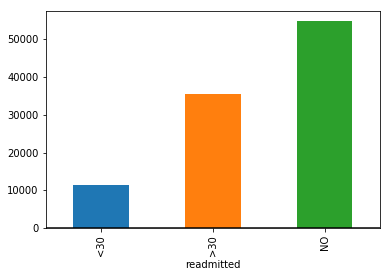

In [12]:
%%time
count_table(df, 'readmitted')

Since we are mainly interested in predicting whether a patient will be readmitted within 30 days, we combined ‘NO’ and ‘>30’ into class 0 and ‘<30’ into class 1. With that arrangement, our now binary response variable will have right skewed distribution. 

As can be seen and was expected, we have quite severe data imbalance, which we will have to deal with in the further steps.


In [96]:
# code class labels into binary 
# 0: 'NO' and '>30'
# 1: '<30'

df['readmitted'] = [0 if x in ('NO', '>30') else 1 for x in df['readmitted']]
df_clean['readmitted'] = df['readmitted']

,readmitted,% of Count
0,90409,88.840084
1,11357,11.159916


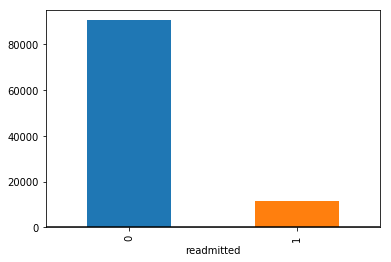

In [97]:
count_table(df_clean, 'readmitted')

**Patient Demographics Features - Race, Gender, Age**

We notice that the demographic features are categorical strings. It can be seen that Race and Gender has missing values, and while Gender is fairly well-balanced, Race is more skewed towards ‘Caucasian’. Additionally, for Age, there is a skew towards elderly patients, implying that we won’t be needing so many bins for this feature, which will be addressed in our cleaning.

In [16]:
res = Q('select race, count(*) from diabetes group by race')
res

,race,count(*)
0,?,2273
1,AfricanAmerican,19210
2,Asian,641
3,Caucasian,76099
4,Hispanic,2037
5,Other,1506


,race,% of Count
Caucasian,76099,74.778413
AfricanAmerican,19210,18.876639
Hispanic,2037,2.001651
Other,1506,1.479866
Asian,641,0.629876


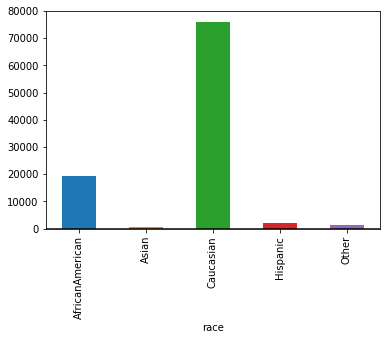

In [98]:
count_table(df, 'race')

In [17]:
res = Q('select gender, count(*) from diabetes group by gender')
res

,gender,count(*)
0,Female,54708
1,Male,47055
2,Unknown/Invalid,3


,gender,% of Count
Female,54708,53.758623
Male,47055,46.238429
Unknown/Invalid,3,0.002948


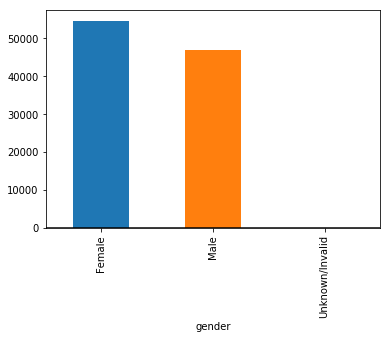

In [99]:
count_table(df, 'gender')

In [18]:
res = Q('select age, count(*) from diabetes group by age')
res

,age,count(*)
0,[0-10),161
1,[10-20),691
2,[20-30),1657
3,[30-40),3775
4,[40-50),9685
5,[50-60),17256
6,[60-70),22483
7,[70-80),26068
8,[80-90),17197
9,[90-100),2793


,age,% of Count
[70-80),26068,25.615628
[60-70),22483,22.092840
[50-60),17256,16.956547
[80-90),17197,16.898571
[40-50),9685,9.516931
[30-40),3775,3.709490
[90-100),2793,2.744532
[20-30),1657,1.628245
[10-20),691,0.679009
[0-10),161,0.158206


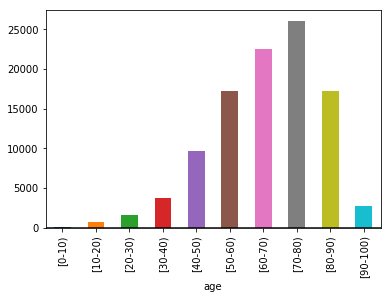

In [100]:
count_table(df, 'age')

**2) Admission & Discharge Information Features**

The *Admission Type, Discharge Disposition and Admission Source ID* features are categorical coded columns, where each code corresponds to a specific sub-category. We recognize these may be important features in our model, but may optimize the coding of the variables by utilizing smarter binning and collapsing the values into fewer important codes.


In [19]:
res = Q('select admission_type_id, count(*) from diabetes group by admission_type_id')
res

,admission_type_id,count(*)
0,1,53990
1,2,18480
2,3,18869
3,4,10
4,5,4785
5,6,5291
6,7,21
7,8,320


,admission_type_id,% of Count
1,53990,53.053083
3,18869,18.541556
2,18480,18.159307
6,5291,5.199182
5,4785,4.701963
8,320,0.314447
7,21,0.020636
4,10,0.009826


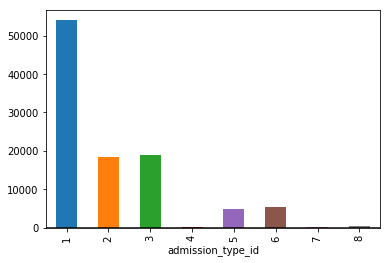

In [101]:
count_table(df, 'admission_type_id')

,discharge_disposition_id,% of Count
1,60234,59.188727
3,13954,13.711849
6,12902,12.678105
18,3691,3.626948
2,2128,2.091072
22,1993,1.958414
11,1642,1.613505
5,1184,1.163453
25,989,0.971837
4,815,0.800857


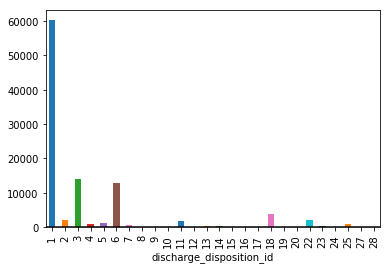

In [102]:
count_table(df, 'discharge_disposition_id')

,admission_source_id,% of Count
7,57494,56.496276
1,29565,29.051943
17,6781,6.663326
4,3187,3.131694
6,2264,2.224712
2,1104,1.084842
5,855,0.840163
3,187,0.183755
20,161,0.158206
9,125,0.122831


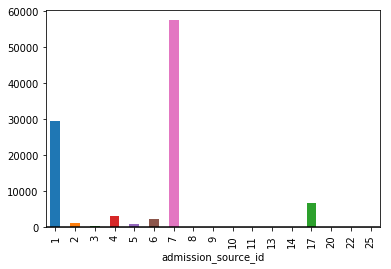

In [103]:
count_table(df, 'admission_source_id')

**Hospital Stay Metrics, No. of Medications and No. of Diagnoses**

Six out of the eight numeric features fall under the Hospital Stay Metrics category, with the other two being No. of Medications and No. of Diagnoses. 

The distributions of the numeric features below gives us an insight into the importance of their role in determining hospital readmission rates as they signify the complexity of a patient’s condition. For example, having higher value for these numeric features could suggest that the patient required additional care and extensive treatment methods, which in turn could lead to a higher readmission rate. It is however important to note that the distributions of certain features are concentrated towards a particular value, implying that they should be handled in a smarter way by balancing out the skewness.

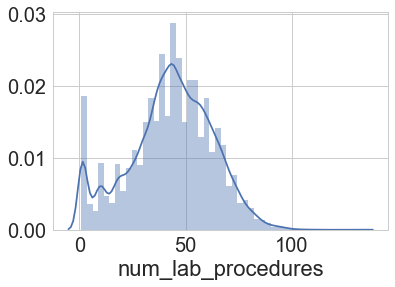

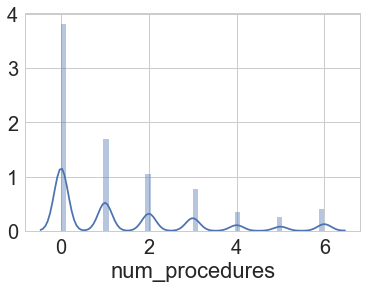

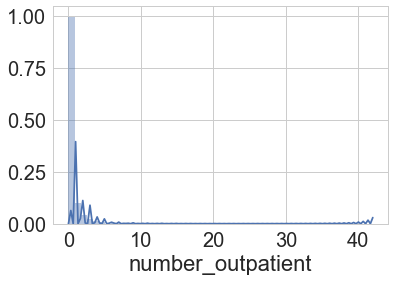

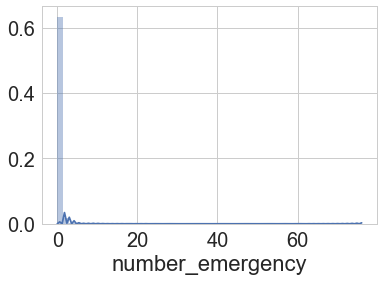

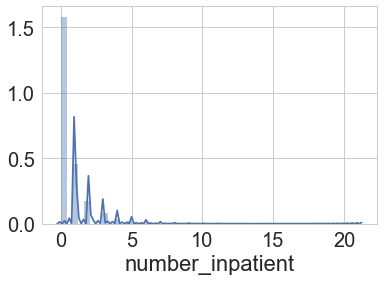

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# Looking at distribution of numeric columns
num_cols_hospital_metrics = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 
                             'number_outpatient', 'number_emergency', 'number_inpatient']

for col in num_cols_hospital_metrics[1:]:
    sns.distplot(df[col])
    plt.show()
    

In [211]:
# a function to plot numeric values 

def hist_num(df, c, num_bins):
        fig, ax = plt.subplots()
        n, bins, patches = ax.hist(df[c], num_bins, density=True, facecolor='g', alpha=0.60)
        
        ax.set_xlabel(c)
        ax.set_ylabel('Probability density')
        ax.set_title(r'Distribution of %s' %(c))

        fig.tight_layout()
        plt.show()

In [105]:
df['time_in_hospital'].describe()

count    101766.000000
mean          4.395987
std           2.985108
min           1.000000
25%           2.000000
50%           4.000000
75%           6.000000
max          14.000000
Name: time_in_hospital, dtype: float64

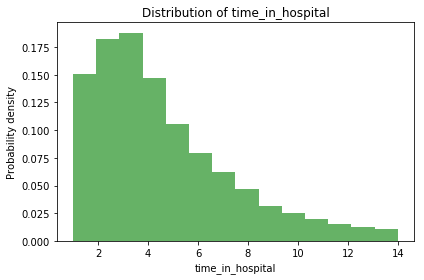

In [212]:
hist_num(df, 'time_in_hospital', 14)

In [163]:
df['num_procedures'].describe()

count    101766.000000
mean          1.339730
std           1.705807
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max           6.000000
Name: num_procedures, dtype: float64

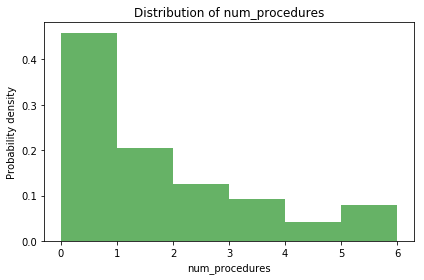

In [213]:
hist_num(df, 'num_procedures', 6)

In [166]:
df['num_lab_procedures'].describe()

count    101766.000000
mean         43.095641
std          19.674362
min           1.000000
25%          31.000000
50%          44.000000
75%          57.000000
max         132.000000
Name: num_lab_procedures, dtype: float64

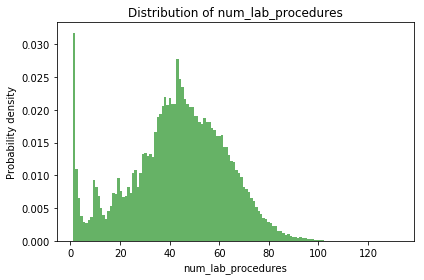

In [214]:
hist_num(df, 'num_lab_procedures', 132)

In [174]:
df['num_medications'].describe()

count    101766.000000
mean         16.021844
std           8.127566
min           1.000000
25%          10.000000
50%          15.000000
75%          20.000000
max          81.000000
Name: num_medications, dtype: float64

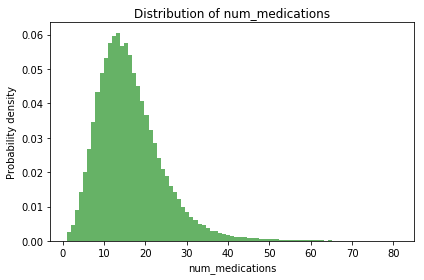

In [215]:
hist_num(df, 'num_medications', 81)

In [177]:
df['number_diagnoses'].describe()

count    101766.000000
mean          7.422607
std           1.933600
min           1.000000
25%           6.000000
50%           8.000000
75%           9.000000
max          16.000000
Name: number_diagnoses, dtype: float64

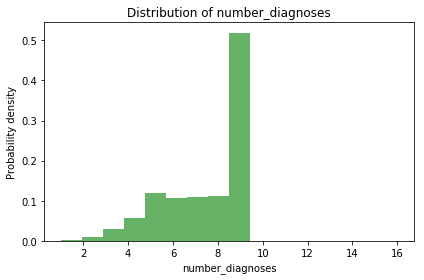

In [216]:
hist_num(df, 'number_diagnoses', 16)

In [180]:
df['number_outpatient'].describe()

count    101766.000000
mean          0.369357
std           1.267265
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          42.000000
Name: number_outpatient, dtype: float64

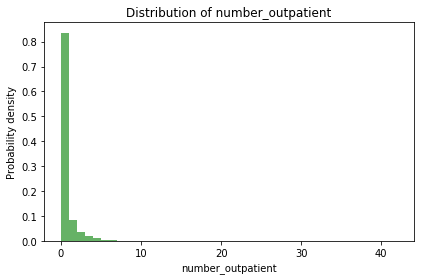

In [217]:
hist_num(df, 'number_outpatient', 42)

In [189]:
df['number_inpatient'].describe()

count    101766.000000
mean          0.635566
std           1.262863
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          21.000000
Name: number_inpatient, dtype: float64

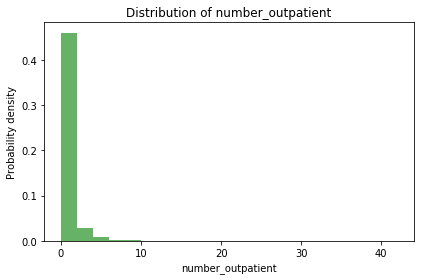

In [218]:
hist_num(df, 'number_outpatient', 21)

In [191]:
df['number_emergency'].describe()

count    101766.000000
mean          0.197836
std           0.930472
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          76.000000
Name: number_emergency, dtype: float64

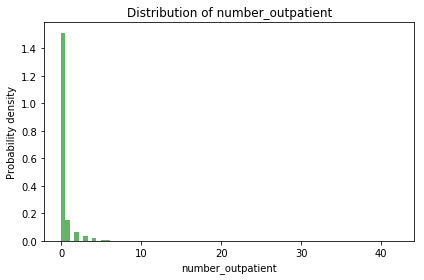

In [219]:
hist_num(df, 'number_outpatient', 76)

**Medical Metrics & Results - Max Glucose Serum, A1C Result**

**max_glu_serum**

This refers to the glucose serum test result. A high value may very well indicate a more severe diabetes problem, thus more likely to return. Though we see a great majority that did not take the test.

,max_glu_serum,% of Count
None,96420,94.746772
Norm,2597,2.551933
>200,1485,1.459230
>300,1264,1.242065


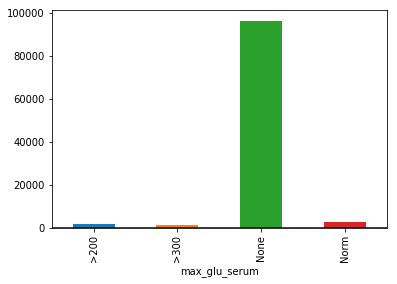

In [220]:
count_table(df, 'max_glu_serum')

**HbA1C**

This feature is the result of a blood test that reflects your average blood glucose level. Again, this may reflect the severity of the diabetes. We though see, like the previous feature, a great majority that simply didn’t take the test.


,A1Cresult,% of Count
None,84748,83.277322
>8,8216,8.073423
Norm,4990,4.903406
>7,3812,3.745848


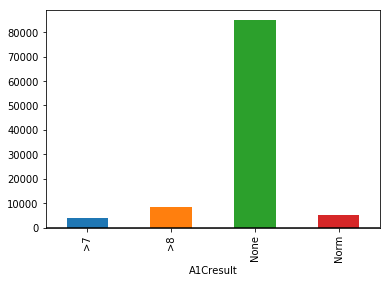

In [195]:
count_table(df, 'A1Cresult')

**diabetes_medication_change**

This feature refers to whether there was change in the diabetic medication. It is in a way related to our previous medication features as a change in them should be reflected in this feature. This may be a useful feature for us. We see a fairly even split between No and Change. 


,change,% of Count
No,54755,53.804807
Ch,47011,46.195193


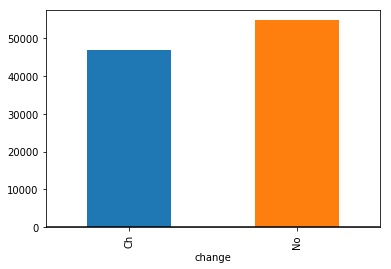

In [197]:
count_table(df, 'change')

**diabetes_medication_prescribed**

Similar to the previous variable, this is another binary feature indicating whether diabetes medicine was prescribed. Such a feature can be indeed indicative if a given patient will return, since it may signify a worsening of their condition if the medicine was prescribed. 


,diabetesMed,% of Count
Yes,78363,77.003125
No,23403,22.996875


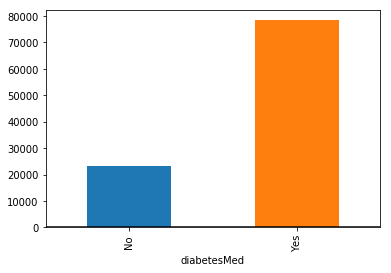

In [196]:
count_table(df, 'diabetesMed')

**Diabetes Medications**

We have 23 different diabetes medications with similar encodings. They are coded with (‘Down’, ‘No’, ‘Steady’, ‘Up), which is referring to the change in in dosage after the given visit. 

In the context of the problem, we suppose that if dosage of medicine has been increased, there is possibly greater chance of readmission, given that is indicative of a worsening condition. 

We can clearly see that some medications give almost no information because of everything being in one class. Such medications are thus good candidates for removal as they add no needed information for the model.

In [290]:
medication_dic = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']
med_code = {'No':0,'Steady':1,'Up':2,'Down':3}

# substract medication dataframe
med = df.loc[:, df.columns.isin(medication_dic)]

# create a df of the count of each medications 
med_count = []
for i in range(23):
    count = med.iloc[:, i].value_counts()
    med_count.append(count)
    
    # convert count list into dataframe 
    med_table = pd.concat(med_count, axis=1)

med_table = med_table.replace(np.nan, 0)    
med_table

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone
Down,575,45,11,1,194,0.0,560,564,0.0,118,87,3,5,0.0,0.0,0.0,0.0,12218,6,0.0,0.0,0.0,0.0
No,81778,100227,101063,101680,96575,101765.0,89080,91116,101743.0,94438,95401,101458,101728,101763.0,101727.0,101766.0,101766.0,47383,101060,101753.0,101765.0,101764.0,101765.0
Steady,18346,1384,668,79,4670,1.0,11356,9274,23.0,6976,6100,295,31,3.0,38.0,0.0,0.0,30849,692,13.0,1.0,2.0,1.0
Up,1067,110,24,6,327,0.0,770,812,0.0,234,178,10,2,0.0,1.0,0.0,0.0,11316,8,0.0,0.0,0.0,0.0


In [291]:
# transpose the table for better viewing 

med_trans = med_table.T
med_trans

,Down,No,Steady,Up
metformin,575.0,81778.0,18346.0,1067.0
repaglinide,45.0,100227.0,1384.0,110.0
nateglinide,11.0,101063.0,668.0,24.0
chlorpropamide,1.0,101680.0,79.0,6.0
glimepiride,194.0,96575.0,4670.0,327.0
acetohexamide,0.0,101765.0,1.0,0.0
glipizide,560.0,89080.0,11356.0,770.0
glyburide,564.0,91116.0,9274.0,812.0
tolbutamide,0.0,101743.0,23.0,0.0
pioglitazone,118.0,94438.0,6976.0,234.0


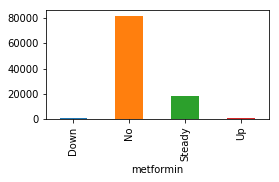

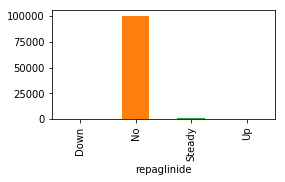

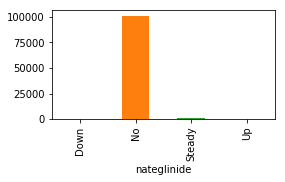

In [346]:
# plot the bar chart of each medications 
import matplotlib.pyplot as plt

for i in range(3):
    plt.figure()
    
    fig, ax = plt.subplots(figsize=(4, 2))
    med_table.iloc[:,i].plot(kind='bar', grid=False)
    ax.set_xlabel( med_table.columns[i])
    
    plt.show()


**Diagnoses Information** 

The features Diagnosis-1, Diagnosis-2 and Diagnosis-3 refer to primary, secondary and additional diagnoses respectively and they correspond to the first three digits of [ICD-9 codes](https://icd.codes/icd9cm). 

The distributions of the variables suggests that the three diagnoses have different values per encounter, and that they have missing values in them. Additionally, just Diagnosis-1 column has 848 distinct values, implying that it is important to collapse these into fewer sub-categories during the cleaning process by utilizing the categorization in ICD official website.

One special code to pay attention to is 250.xx which corresponds to Diabates. 



### 2.3 Data Cleaning

After taking a closer looks of each features, we now starts to clean and encode this dataset. 

In [132]:
# create an empty dataframe to store data later 
df_clean = pd.DataFrame()

# start buiding clean df
df_clean['encounter_id'] = data.encounter_id
df_clean['patient_id'] = data.patient_nbr


### 2.3.1 Numeric features

We treated the 8 numeric features in two ways: 

* Kept original values

* Grouped into categories and apply integer encoding


In [133]:
# number_outpatient: continuous value 
# number_emergency: continuous value 
# number_inpatient: continuous value 

# data.num_lab_procedures.unique()

df_clean['number_outpatient'] = data['number_outpatient']
df_clean['number_emergency'] = data['number_emergency']
df_clean['number_inpatient'] = data['number_inpatient']

In [134]:
# time_in_hospital: code into range and then integer encoding 
# data.time_in_hospital.unique()

for i, row in data.time_in_hospital.iteritems():
    if row <= 4:
        data.at[i, 'time_in_hospital'] = 0
    if (row > 4) & (row <= 9):
        data.at[i, 'time_in_hospital'] = 1
    if (row >9):
        data.at[i, 'time_in_hospital'] = 2

df_clean['time_in_hospital'] = data['time_in_hospital']


In [135]:
# num_lab_procedures: code into range and then integer encoding 
# df.num_lab_procedures.unique()

for i, row in data.num_lab_procedures.iteritems():
    if row <= 30:
        data.at[i, 'num_lab_procedures'] = 0
    if (row > 30) & (row <=60):
        data.at[i, 'num_lab_procedures'] = 1
    if (row > 60):
        data.at[i, 'num_lab_procedures'] = 2
        
df_clean['num_lab_procedures'] = data['num_lab_procedures']


In [136]:
# num_procedures: code into range and then integer encoding 

for i, row in data.num_procedures.iteritems():
    if row <= 2:
        data.at[i, 'num_procedures'] = 0
    if (row > 2) & (row <= 4):
        data.at[i, 'num_procedures'] = 1
    if (row > 4):
        data.at[i, 'num_procedures'] = 2
        
df_clean['num_procedures'] = data['num_procedures']

In [137]:
# num_medications: code into range and then integer encoding 
# df.num_medications.unique()

for i, row in data.num_medications.iteritems():
    if row <= 20:
        data.at[i, 'num_medications'] = 0
    if (row > 20) & (row <= 30):
        data.at[i, 'num_medications'] = 1
    if (row > 30):
        data.at[i, 'num_medications'] = 2
        
df_clean['num_medications'] = data['num_medications']

In [138]:
# number_diagnoses: code into range and then integer encoding 
# data.number_diagnoses.unique()

for i, row in data.number_diagnoses.iteritems():
    if row <= 4:
        data.at[i, 'number_diagnoses'] = 0
    if (row > 4) & (row <= 6):
        data.at[i, 'number_diagnoses'] = 1
    if (row > 6) & (row <= 8):
        data.at[i, 'number_diagnoses'] = 2
    if (row > 8):
        data.at[i, 'number_diagnoses'] = 3
        
df_clean['number_diagnoses'] = data['number_diagnoses']

### 2.3.2 Categorical features

For categorical features, we employed three types of encoding techniques based on the nature of the data, which includes: binary encoding, integer encoding and one-hot encoding.


**Binary encoding**

We applied binary encoding to features which are binary by nature, which includes response variable ‘readmitted’ and three binary features ‘gender’, ‘change’ and ‘diabetesMed’. 

In [139]:
# for gender: have 3 unknowns

# gender_code = {'Female':0,'Male':1,'Unknown/Invalid':1} # build a dictionary for encoding 
# df_clean.gender = [gender_code[x] for x in df.gender] # 

df_clean['is_male'] = [1 if x == 'Male' else 0 for x in data.gender]
# df_clean.head()

In [140]:
# Change in medications: binary encoding 

change_code = {'No':0,'Ch':1}
data.change = [change_code[x] for x in data.change]
df_clean['change_in_medications'] = data.change

In [141]:
# Diabetes medications: binary encoding 

diabetesMed_code = {'No':0,'Yes':1}
data.diabetesMed = [diabetesMed_code[x] for x in data.diabetesMed]
df_clean['diabetesMed'] = data.diabetesMed

**Integer encoding**

For categorical features which are ordinal, we applied integer encoding to keep their natural orders. Those features includes: ‘A1Cresult’, ‘max_glu_serum’, and the 23 medication columns. 

In [142]:
# max_glu_serum: integer encoding 

max_glu_serum_code = {'None':0,'Norm':1,'>200':2,'>300':3}
data.max_glu_serum = [max_glu_serum_code[x] for x in data.max_glu_serum]
df_clean['max_glu_serum'] = data.max_glu_serum

# data.max_glu_serum.unique()

In [143]:
# A1Cresult: integer encoding 

A1Cresult_code = {'None':0,'Norm':1,'>7':2,'>8':3}
data.A1Cresult = [A1Cresult_code[x] for x in data.A1Cresult]
df_clean['A1Cresult'] = data.A1Cresult


In [144]:
# for age: Bin-counting scheme
# orginally was categorical range but have order 
# so we code them into 0, 1, 2 

youth = ['[0-10)', '[10-20)']
adult = ['[20-30)', '[30-40)', '[40-50)']
elderly = ['[50-60)','[60-70)','[70-80)','[80-90)','[90-100)']

age_codes = []
for x in data.age:
    if x in youth:
        age_codes.append(0)
    elif x in adult:
        age_codes.append(1)
    else:
        age_codes.append(2)
        
data.age = age_codes 
df_clean['age'] = data.age
# df_clean['age'] = data['age']

# df_clean.head()
# df_clean['age_youth'] = [1 if x==0 else 0 for x in data.age]
# df_clean['age_adult'] = [1 if x==1 else 0 for x in data.age]
# df_clean['age_elderly'] = [1 if x==2 else 0 for x in data.age]

**One-hot encoding**

For categorical features which are nominal, we applied one-hot encoding. Some algorithms such as logistic regression are sensitive to the weights of values. Applying one-hot encoding on nominal features enables us not to confuse the algorithms. Those features includes: ‘race’, ‘dmission_type_id’, ‘admission_source_id’, ‘discharge_diposition’, and the 3 diagnosis columns. 


In [145]:
# Mode imputation is used for Missing Values in Race Column

max_race_count = max(data.race.value_counts())
max_race = data.race.value_counts()[data.race.value_counts()==max_race_count].index[0]
data.race.replace('?', max_race, inplace=True)


In [146]:
# for race: One-hot encoding 

df_clean['race_white'] = [1 if x == 'Caucasian' else 0 for x in data.race]
df_clean['race_aa'] = [1 if x == 'AfricanAmerican' else 0 for x in data.race]
df_clean['race_hispanic'] = [1 if x == 'Hispanic' else 0 for x in data.race]
df_clean['race_asian'] = [1 if x == 'Asian' else 0 for x in data.race]

In [147]:
# admission type id: OHE
# coded into 5 columns based on their meanings 
# 5: not avilable, 6: NULL, 8: Not Mapped 

# data.admission_type_id.unique()

df_clean['admission_emergency_urgent'] = [1 if x in (1,2) else 0 for x in data.admission_type_id]
df_clean['admission_elective'] = [1 if x==3 else 0 for x in data.admission_type_id]
df_clean['admission_newborn'] = [1 if x==4 else 0 for x in data.admission_type_id]
df_clean['admission_trauma'] = [1 if x==7 else 0 for x in data.admission_type_id]
df_clean['admission_unknown'] = [1 if x in (5,6,8) else 0 for x in data.admission_type_id]

# df_clean.head()

In [148]:
# admission_source_id, one hot encode
# Collapsing multiple categories into one - if all 0, assumed "Other" Category
df_clean['admission_source_emergency_room'] = [1 if x==7 else 0 for x in data.admission_source_id]
df_clean['admission_source_physician_referral'] = [1 if x==1 else 0 for x in data.admission_source_id]
df_clean['admission_source_transfer_hospital_health_care_facility_clinic'] = [1 if x in (4,6,2) else 0 for x in data.admission_source_id]


In [149]:
# discharge_disposition_id: OHE after collapse

# df.discharge_disposition_id.unique()

# Collapsed Multiple discharge_disposition_ids into fewer categories:<br>
# discharge_disposition_unknown: 18, 25, 26<br>
# discharge_disposition_home_other_facility: 1, 2, 3, 4, 5, 6, 7, 8, 10, 16, 22, 23, 24, 27, 28, 29, 30<br>
# discharge_disposition_current_hospital_patient: 9, 12, 15, 17
    
df_clean['discharge_diposition_unknown'] = [1 if x in (18, 25, 26) else 0 for x in data.discharge_disposition_id]
df_clean['discharge_diposition_home_other_facility'] = [1 if x in (1, 2, 3, 4, 5, 6, 7, 8, 10, 16, 22, 23, 24, 27, 28, 29, 30) else 0 for x in data.discharge_disposition_id]
df_clean['discharge_diposition_current_hospital_patient'] = [1 if x in (9, 12, 15, 17) else 0 for x in data.discharge_disposition_id]


### 2.3.3 Feature Engineering

As we can see from Feature Analysis and Distribution, the 23 medication columns are sparse with many columns highly skewed to a single value. 

In order to best discover the relationship of medication usage with readmission rate, we created two new features from the 23 medication columns. 

* ‘num_medicine_change’ counts the changes of medication usages during each encounter (visit)

* ‘num_total_medicine’ which counts the total medication usages. 


In [150]:
# 23 features/columns of medications
# create two new columns of num_medicine_change and num_total_medicine

medicine_col_names = data.columns[23:46]
medicine_df = data[medicine_col_names]
num_medicine_change_series = medicine_df.isin(['Up', 'Down']).sum(1)
num_total_medicine_series = medicine_df.isin(['Up', 'Down', 'Steady']).sum(1)

data.insert(data.columns.get_loc('metformin-pioglitazone') + 1, 'num_total_medicine', num_total_medicine_series, allow_duplicates = True)
data.insert(data.columns.get_loc('num_total_medicine') + 1, 'num_medicine_change', num_medicine_change_series, allow_duplicates = True)


In [151]:
# Encoding the Medicines Columns: integer encoding 
# only considering columns that have considerable amount of important data
# 14 medicine columns for now

metformin_code = {'No':0,'Steady':1,'Up':2,'Down':3}

data.metformin = [metformin_code[x] for x in data.metformin]
df_clean['metformin'] = data.metformin

data.repaglinide = [metformin_code[x] for x in data.repaglinide]
df_clean['repaglinide'] = data.repaglinide

data.nateglinide = [metformin_code[x] for x in data.nateglinide]
df_clean['nateglinide'] = data.nateglinide

data.chlorpropamide = [metformin_code[x] for x in data.chlorpropamide]
df_clean['chlorpropamide'] = data.chlorpropamide

data.glimepiride = [metformin_code[x] for x in data.glimepiride]
df_clean['glimepiride'] = data.glimepiride

data.glipizide = [metformin_code[x] for x in data.glipizide]
df_clean['glipizide'] = data.glipizide

data.glyburide = [metformin_code[x] for x in data.glyburide]
df_clean['glyburide'] = data.glyburide

data.pioglitazone = [metformin_code[x] for x in data.pioglitazone]
df_clean['pioglitazone'] = data.pioglitazone

data.rosiglitazone = [metformin_code[x] for x in data.rosiglitazone]
df_clean['rosiglitazone'] = data.rosiglitazone

data.acarbose = [metformin_code[x] for x in data.acarbose]
df_clean['acarbose'] = data.acarbose 

data.miglitol = [metformin_code[x] for x in data.miglitol]
df_clean['miglitol'] = data.miglitol

data.tolazamide = [metformin_code[x] for x in data.tolazamide]
df_clean['tolazamide'] = data.tolazamide

data.insulin = [metformin_code[x] for x in data.insulin]
df_clean['insulin'] = data.insulin

data['glyburide-metformin'] = [metformin_code[x] for x in data['glyburide-metformin']]
df_clean['glyburide_metformin'] = data['glyburide-metformin']


In [152]:
# adding two new columns to clean dataframe - num_medicine_change and num_total_medicine
df_clean['num_medicine_change'] = data['num_medicine_change']
df_clean['num_total_medicine'] = data['num_total_medicine']


In [170]:
df_clean['num_total_medicine'].describe()

count    101766.000000
mean          1.179697
std           0.920166
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           6.000000
Name: num_total_medicine, dtype: float64

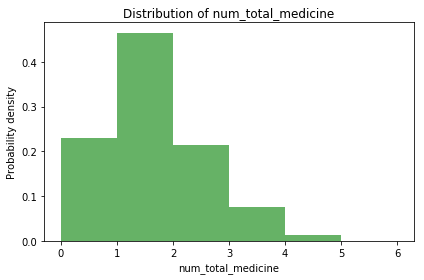

In [221]:
hist_num(df_clean, 'num_total_medicine', 6)

In [174]:
df_clean['num_medicine_change'].describe()

count    101766.000000
mean          0.287444
std           0.487526
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           4.000000
Name: num_medicine_change, dtype: float64

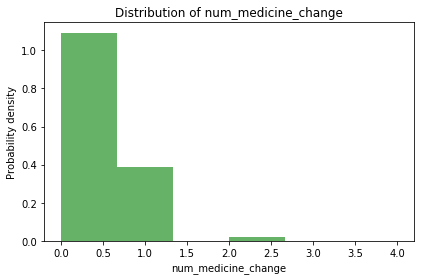

In [222]:
hist_num(df_clean, 'num_medicine_change', 6)

### Encode diag_1 by ICD-9 Code

The 3 giagnose columns need to be re-coded in order to present useful information. Based on ICD-9 code, we re-coded ‘diag_1’ into 9 features which corresponds to 9 major primary diagnosis and one ‘other’ column. 


"""**ICD-9 Code Categories: https://icd.codes/icd9cm**

** Diabetes: 250.xx 

1) 001-139 : Infectious And Parasitic Diseases **= Infection**<br>
2) 140-239 : Neoplasms ** = Neoplasms**<br>
3) 240-279 : Endocrine, Nutritional And Metabolic Diseases, And Immunity Disorders ** = Endocrine**<br>
4) 280-289 : Diseases Of The Blood And Blood-Forming Organs ** = Blood**<br>
5) 290-319 : Mental Disorders ** = Mental**<br>
6) 320-389 : Diseases Of The Nervous System And Sense Organs ** = Nervous**<br>
7) 390-459 : Diseases Of The Circulatory System ** = Circulatory**<br>
8) 460-519 : Diseases Of The Respiratory System ** = Respiratory**<br>
9) 520-579 : Diseases Of The Digestive System ** = Digestive**<br>
10) 580-629 : Diseases Of The Genitourinary System ** = Genitourinary**<br>
11) 630-679 : Complications Of Pregnancy, Childbirth, And The Puerperium ** = Pregnancy_Childbirth**<br>
12) 680-709 : Diseases Of The Skin And Subcutaneous Tissue ** = Skin**<br>
13) 710-739 : Diseases Of The Musculoskeletal System And Connective Tissue ** = Musculoskeletal**<br>
14) 740-759 : Congenital Anomalies ** = Congenital**<br>
15) 760-779 : Certain Conditions Originating In The Perinatal Period ** = Perinatal_Condition**<br>
16) 780-799 : Symptoms, Signs, And Ill-Defined Conditions ** = Symptoms**<br>
17) 800-999 : Injury And Poisoning ** = Injury_Poisoning**<br>
18) V01-V91 : Supplementary Classification Of Factors Influencing Health Status And Contact With Health Services ** = Additional_Factors**<br>
19) E000-E999 : Supplementary Classification Of External Causes Of Injury And Poisoning ** = External_Cause**
"""

In [ ]:
# diag_1, diag_2, diag_3

col = data['diag_1']

# set the idx as diag_1+1
data.insert(data.columns.get_loc('diag_1') + 1, 'numeric_diag_1', col, allow_duplicates=True)

# type(data['numeric_diag_1'])
# data.reset_index(level = ['numeric_diag_1'])
                          
# temporarily inputting -1 in numeric_diag columns for codes with 'V' or 'E'
data.loc[data['numeric_diag_1'].str.contains("V|E")==True, ['numeric_diag_1']] = '-1'

# replace '?' with NaN in numeric_diag columns
data = data.replace({'numeric_diag_1': '?'}, np.nan)

#converting numeric_diag columns to numeric datatype
data['numeric_diag_1'] = pd.to_numeric(data.numeric_diag_1)

# creating duplicate numeric_diag_1 column as category_diag_1
col = data['numeric_diag_1']
data.insert(data.columns.get_loc('numeric_diag_1') + 1, 'category_diag_1', col, allow_duplicates = True)


In [43]:
# Encoding the categories for value range in ICD-9 Diagnosis Codes

def encode_diagnosis_categories(diag_col_name, data):
    temp_data = data
    
    temp_data[diag_col_name] = np.where(((temp_data[diag_col_name] >= 250) & (temp_data[diag_col_name] < 251)), 
                                    1000, data[diag_col_name])
    
    temp_data[diag_col_name] = np.where(temp_data[diag_col_name].between(0, 140, inclusive=False), 
                                    1001, data[diag_col_name]) #'Infection', data[diag_col_name])
    temp_data[diag_col_name] = np.where(temp_data[diag_col_name].between(139, 240, inclusive=False), 
                                    1002, data[diag_col_name]) #'Neoplasms', data[diag_col_name])
    
    temp_data[diag_col_name] = np.where(temp_data[diag_col_name].between(239, 250, inclusive=False), 
                                    1003, data[diag_col_name]) #'Endocrine', data[diag_col_name])
    temp_data[diag_col_name] = np.where(temp_data[diag_col_name].between(250, 280, inclusive=False), 
                                    1003, data[diag_col_name]) #'Endocrine', data[diag_col_name])
    
    temp_data[diag_col_name] = np.where(temp_data[diag_col_name].between(279, 290, inclusive=False), 
                                    1004, data[diag_col_name]) #'Blood', data[diag_col_name])
    temp_data[diag_col_name] = np.where(temp_data[diag_col_name].between(289, 320, inclusive=False), 
                                    1005, data[diag_col_name]) #'Mental', data[diag_col_name])
    temp_data[diag_col_name] = np.where(temp_data[diag_col_name].between(319, 390, inclusive=False), 
                                    1006, data[diag_col_name]) #'Nervous', data[diag_col_name])
    temp_data[diag_col_name] = np.where(temp_data[diag_col_name].between(389, 460, inclusive=False), 
                                    1007, data[diag_col_name]) #'Circulatory', data[diag_col_name])
    temp_data[diag_col_name] = np.where(temp_data[diag_col_name].between(459, 520, inclusive=False), 
                                    1008, data[diag_col_name]) #'Respiratory', data[diag_col_name])
    temp_data[diag_col_name] = np.where(temp_data[diag_col_name].between(519, 580, inclusive=False), 
                                    1009, data[diag_col_name]) #'Digestive', data[diag_col_name])
    temp_data[diag_col_name] = np.where(temp_data[diag_col_name].between(579, 630, inclusive=False), 
                                    1010, data[diag_col_name]) #'Genitourinary', data[diag_col_name])
    temp_data[diag_col_name] = np.where(temp_data[diag_col_name].between(629, 680, inclusive=False), 
                                    1011, data[diag_col_name]) #'Pregnancy_Chidlbirth', data[diag_col_name])
    temp_data[diag_col_name] = np.where(temp_data[diag_col_name].between(679, 710, inclusive=False), 
                                    1012, data[diag_col_name]) #'Skin', data[diag_col_name])
    temp_data[diag_col_name] = np.where(temp_data[diag_col_name].between(709, 740, inclusive=False), 
                                    1013, data[diag_col_name]) #'Musculoskeletal', data[diag_col_name])
    temp_data[diag_col_name] = np.where(temp_data[diag_col_name].between(739, 760, inclusive=False), 
                                    1014, data[diag_col_name]) #'Congenital', data[diag_col_name])
    temp_data[diag_col_name] = np.where(temp_data[diag_col_name].between(759, 780, inclusive=False), 
                                    1015, data[diag_col_name]) #'Perinatal_Condition', data[diag_col_name])
    temp_data[diag_col_name] = np.where(temp_data[diag_col_name].between(779, 800, inclusive=False), 
                                    1016, data[diag_col_name]) #'Symptoms', data[diag_col_name])
    temp_data[diag_col_name] = np.where(temp_data[diag_col_name].between(799, 1000, inclusive=False), 
                                    1017, data[diag_col_name]) #'Injury_Poisoning', data[diag_col_name])
    temp_data[diag_col_name] = np.where(temp_data[diag_col_name] == -1, 
                                    1018, data[diag_col_name]) #'Additional_Factors/External_Cause', data[diag_col_name])
    return temp_data


In [ ]:
cols = ['category_diag_1']
data = encode_diagnosis_categories(cols[0], data)
num_vals = [1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 
            1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018]
string_vals = ['Diabetes', 'Infection', 'Neoplasms', 'Endocrine', 'Blood', 'Mental', 'Nervous', 'Circulatory', 'Respiratory', 'Digestive', 'Genitourinary',
              'Pregnancy_Childbirth', 'Skin', 'Musculoskeletal', 'Congenital', 'Perinatal_Condition', 'Symptoms', 'Injury_Poisoning', 'Additional_Factors/External_Cause']

for i in range(len(num_vals)):
    # data.replace({col: 1001}, 'Infection')
    data = data.replace({cols[0]: num_vals[i]}, string_vals[i]) 

data = data.replace({cols[0]: np.nan}, "Unknown")


In [45]:
# Collapsing Multiple diag_1 categories into main categories
diag_categories = ['Diabetes', 'Circulatory', 'Endocrine', 'Respiratory', 'Digestive', 
                   'Symptoms', 'Injury_Poisoning', 'Genitourinary', 'Musculoskeletal', 'Neoplasms', 'Other']

def one_hot_encode(string_value):
    return([1 if x==string_value else 0 for x in data.category_diag_1])

df_clean['diag1_Diabetes'] = one_hot_encode('Diabetes')
df_clean['diag1_circulatory'] = one_hot_encode('Circulatory')
df_clean['diag1_endocrine'] = one_hot_encode('Endocrine')
df_clean['diag1_respiratory'] = one_hot_encode('Respiratory')
df_clean['diag1_digestive'] = one_hot_encode('Digestive')
df_clean['diag1_symptoms'] = one_hot_encode('Symptoms')
df_clean['diag1_injury_poisoning'] = one_hot_encode('Injury_Poisoning')
df_clean['diag1_genitourinary'] = one_hot_encode('Genitourinary')
df_clean['diag1_musculoskeletal'] = one_hot_encode('Musculoskeletal')
df_clean['diag1_neoplasms'] = one_hot_encode('Neoplasms')
df_clean['diag1_other'] = [1 if x not in diag_categories else 0 for x in data.category_diag_1]


In [ ]:
count_table(data, 'diabetesMed')

In [46]:
# create an additional column category_diag_1 to keep the string values of diag_1 
# which was OHE before to run in the algorithm 

diag_categories = ['Diabetes','Circulatory', 'Endocrine', 'Respiratory', 'Digestive', 
                   'Symptoms', 'Injury_Poisoning', 'Genitourinary', 'Musculoskeletal', 'Neoplasms']

data.loc[~data.category_diag_1.isin(diag_categories), 'category_diag_1'] = 'Other'

# insert this columns into df_clean
col = data['category_diag_1']
df_clean.insert(df_clean.columns.get_loc('number_inpatient') + 1, 'category_diag_1', col, allow_duplicates=True)


In [ ]:
print(df_clean.shape[1]-3, "features after cleaning the input data!\n")

print("Sample preview of Cleaned Data:\n")
print(df_clean.head(3))

## 3 Model Training and Parameter Tuning

After cleaning and encoding data, now we moved to model traing. 

In [7]:
import pandas as pd
import numpy as np
import random
from time import time

# preprocessing packages
from sklearn.preprocessing import StandardScaler
from sklearn import metrics, svm, preprocessing, model_selection
from sklearn.model_selection import train_test_split, KFold
from imblearn.over_sampling import SMOTE
from imblearn import under_sampling, over_sampling
from sklearn.decomposition import PCA

# model training packages 
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import Perceptron, LogisticRegression

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from collections import Counter

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


In [9]:
# define a import function to produce np.array for X and Y
# import the final clean dataset that was processed in the above manner

def import_data():
    df = pd.read_csv('Desktop/clean_diabetic_data.csv')
    df.drop(['encounter_id','patient_id','category_diag_1'], axis=1, inplace=True)
    
    X = df[df.columns[:-1]]
    Y = df[df.columns[-1:]]
    
    X = np.array(X)
    Y = np.array(Y.readmitted)
    
    return(X,Y, df)

X,Y, df = import_data()
df.describe()

,race_white,race_aa,race_hispanic,race_asian,is_male,age,admission_emergency_urgent,admission_elective,admission_newborn,admission_trauma,admission_unknown,discharge_diposition_unknown,discharge_diposition_expired,discharge_diposition_home_other_facility,discharge_diposition_current_hospital_patient,admission_source_emergency_room,admission_source_physician_referral,admission_source_transfer_hospital_health_care_facility_clinic,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag1_circulatory,diag1_endocrine,diag1_respiratory,diag1_digestive,diag1_symptoms,diag1_injury_poisoning,diag1_genitourinary,diag1_musculoskeletal,diag1_neoplasms,diag1_other,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,miglitol,tolazamide,insulin,glyburide_metformin,num_medicine_change,num_total_medicine,change_in_medications,diabetesMed,readmitted
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,0.770120,0.188766,0.020017,0.006299,0.462384,1.834709,0.712124,0.185416,0.000098,0.000206,0.102156,0.045988,0.016233,0.936786,0.000992,0.564963,0.290519,0.064412,0.457432,0.952971,0.291718,0.286117,0.164485,0.111855,0.479050,0.298096,0.112601,0.102264,0.090482,0.075035,0.068530,0.049899,0.048710,0.033734,0.120649,2.086542,0.091966,0.366154,0.218197,0.017088,0.007360,0.000924,0.058035,0.143231,0.123715,0.076627,0.066004,0.003184,0.000491,0.000393,0.885708,0.007134,0.287444,1.179706,0.461952,0.770031,0.111599
std,0.420758,0.391325,0.140057,0.079115,0.498586,0.393339,0.452775,0.388636,0.009912,0.014364,0.302855,0.209460,0.126372,0.243348,0.031488,0.495764,0.454004,0.245487,0.635131,0.652980,0.603717,0.554238,0.370717,0.315189,0.732662,0.457424,0.316107,0.302997,0.286873,0.263449,0.252654,0.217737,0.215262,0.180545,0.325721,1.034162,0.432688,0.889615,0.474826,0.147008,0.091794,0.033162,0.269318,0.413361,0.397017,0.286900,0.265096,0.059557,0.028726,0.020312,1.021758,0.087145,0.487526,0.920190,0.498553,0.420815,0.314874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000

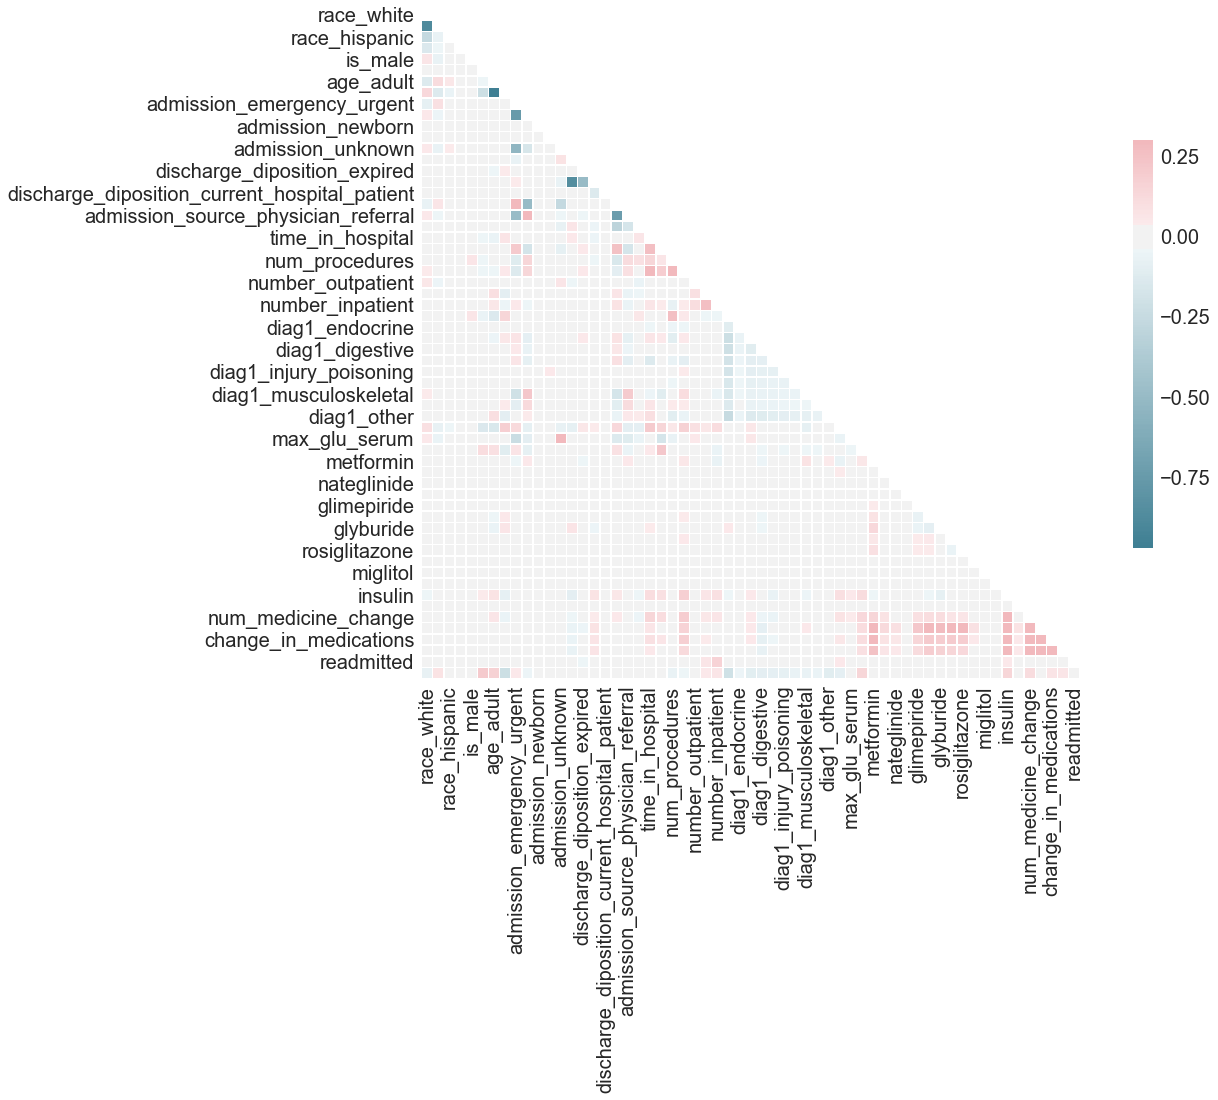

In [53]:
# a plot to show the correlation of this cleaned dataset

corr = df.corr()
sns.set(font_scale=2, style="whitegrid")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#plt.savefig('Plots/corr_matrix_new_tight.png', bbox_inches='tight')
plt.show()


In [11]:
# define models
log_reg = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

multinomial_nb = MultinomialNB(alpha=0.5, class_prior=None, fit_prior=False)

gaussian_nb = GaussianNB()

gradient_boosting = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=5, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

adaboost = AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=20, n_estimators=25, random_state=None)

random_forest = RandomForestClassifier(random_state=12, class_weight='balanced_subsample', criterion='gini',
max_depth=8, max_features='log2', min_samples_leaf=340)


In [12]:
# define a ensemble model 

def ensemble_cv(X,Y,model_list,KFold_splits,voting_type):
    kf = KFold(n_splits = KFold_splits, random_state = 12, shuffle = True) # shuffle True or False?
    
    iteration = 0
    test_accuracy_score_list = []
    train_accuracy_score_list = []
    train_recall_score_list = []
    test_recall_score_list = []
    test_precision_score_list = []
    train_precision_score_list = []
    test_f1_score_list = []
    train_f1_score_list = []
    class_0_accuracy_list = []
    class_1_accuracy_list = []
    class_0_recall_list = []
    class_1_recall_list = []
    train_roc_auc_list = []
    test_roc_auc_list = []
    confusion_matrix_list = []
    
    for train_index, test_index in kf.split(X):
        iteration += 1
        print("fold: ",iteration)
        
        train_X, test_X = X[train_index], X[test_index]
        train_Y, test_Y = Y[train_index], Y[test_index]
        
        estimator_list = []
        model_names = ['m'+str(i+1) for i in range(len(model_list))]
        for model,model_name in zip(model_list,model_names):
            estimator_list.append((model_name,model))
        eclf = VotingClassifier(estimators=estimator_list, voting=voting_type)
        eclf.fit(train_X,train_Y)
        train_predictions = eclf.predict(train_X)
        test_predictions = eclf.predict(test_X)

        train_accuracy_score_list.append(metrics.accuracy_score(train_Y,train_predictions))
        test_accuracy_score_list.append(metrics.accuracy_score(test_Y,test_predictions))
        train_recall_score_list.append(metrics.recall_score(train_Y,train_predictions))
        test_recall_score_list.append(metrics.recall_score(test_Y,test_predictions))
        train_precision_score_list.append(metrics.precision_score(train_Y, train_predictions))
        test_precision_score_list.append(metrics.precision_score(test_Y, test_predictions))
        train_f1_score_list.append(metrics.f1_score(train_Y, train_predictions))
        test_f1_score_list.append(metrics.f1_score(test_Y, test_predictions))
        cm = metrics.confusion_matrix(test_Y,  test_predictions)
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        class_0_accuracy_list.append(cm.diagonal()[0])
        class_1_accuracy_list.append(cm.diagonal()[1])
        class_0_recall_list.append(metrics.recall_score(test_Y,test_predictions,average=None)[0])
        class_1_recall_list.append(metrics.recall_score(test_Y,test_predictions,average=None)[1])
        train_roc_auc_list.append(metrics.roc_auc_score(train_Y, train_predictions))
        test_roc_auc_list.append(metrics.roc_auc_score(test_Y, test_predictions))
        
        confusion_matrix_list.append(metrics.confusion_matrix(test_Y, test_predictions))
        
    results_df = pd.DataFrame(index=['accuracy','recall','precision','f1','roc'])
    results_df['train'] = [np.mean(train_accuracy_score_list),np.mean(train_recall_score_list),
                           np.mean(train_precision_score_list),np.mean(train_f1_score_list),
                          np.mean(train_roc_auc_list)]
    results_df['test'] = [np.mean(test_accuracy_score_list),np.mean(test_recall_score_list),
                           np.mean(test_precision_score_list),np.mean(test_f1_score_list),
                          np.mean(test_roc_auc_list)]
    results_df['class_0_test'] = [np.mean(class_0_accuracy_list),np.mean(class_0_recall_list),'-','-','-']
    results_df['class_1_test'] = [np.mean(class_1_accuracy_list),np.mean(class_1_recall_list),'-','-','-']
    confusion_matrix = pd.DataFrame(index=['actual_class_0','actual_class_1'],columns=['predicted_class_0','predicted_class_1'])
    confusion_matrix.iloc[0] = sum(confusion_matrix_list)[0]
    confusion_matrix.iloc[1] = sum(confusion_matrix_list)[1]
    print(confusion_matrix)
    print(results_df)

### The Final result

With ensemble learning, we chose a combination of multinomial naive bayes, gradient boosting and random forest. The performance of this final chosen model is as following: 

In [13]:
# the fnal ensemble model 

chosen_ensemble = [multinomial_nb, gradient_boosting, random_forest]
print('Running 10-Fold CV on the chosen ensemble model...')
ensemble_cv(X,Y,chosen_ensemble,10,'hard')

Running 10-Fold CV on the chosen ensemble model...
fold:  1


/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


fold:  2


/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


fold:  3


/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


fold:  4


/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


fold:  5


/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


fold:  6


/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


fold:  7


/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


fold:  8


/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


fold:  9


/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


fold:  10


/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


                predicted_class_0  predicted_class_1
actual_class_0              54017              36392
actual_class_1               4536               6821
              train      test class_0_test class_1_test
accuracy   0.599689  0.597822     0.597474     0.600646
recall     0.607860  0.600646     0.597474     0.600646
precision  0.159950  0.157893            -            -
f1         0.253179  0.249942            -            -
roc        0.603261  0.599060            -            -


### Note: 

The code after this part are trail runs of different models using the same function. Those models are not chosen based on their performance and this part could be skipped through. 

In [37]:
# def a function for k_fold CV

def k_fold(X, Y, KFold_splits, model):
    
    kf = KFold(n_splits = KFold_splits, random_state = 12, shuffle = True) # shuffle True or False?
    
    iteration = 0
    
    test_accuracy_score_list = []
    train_accuracy_score_list = []
    train_recall_score_list = []
    test_recall_score_list = []
    test_precision_score_list = []
    train_precision_score_list = []
    test_f1_score_list = []
    train_f1_score_list = []
    
    class_0_accuracy_list = []
    class_1_accuracy_list = []
    class_0_recall_list = []
    class_1_recall_list = []
    
    train_roc_auc_list = []
    test_roc_auc_list = []
    
    for train_index, test_index in kf.split(X):
        iteration += 1
        print(iteration)
        
        train_X, test_X = X[train_index], X[test_index]
        train_Y, test_Y = Y[train_index], Y[test_index]
        
#         scaler = preprocessing.StandardScaler()
#         train_X = scaler.fit_transform(train_X.astype(np.float64))
#         test_X = scaler.transform(test_X.astype(np.float64))
        
#         sm = SMOTE(random_state=12, ratio = 1.0)
#         train_X, train_Y = sm.fit_sample(train_X, train_Y)
        
        model.fit(train_X,train_Y)
        train_predictions = model.predict(train_X)
        test_predictions = model.predict(test_X)
        
        train_accuracy_score_list.append(metrics.accuracy_score(train_Y,train_predictions))
        test_accuracy_score_list.append(metrics.accuracy_score(test_Y,test_predictions))
        train_recall_score_list.append(metrics.recall_score(train_Y,train_predictions))
        test_recall_score_list.append(metrics.recall_score(test_Y,test_predictions))
        train_precision_score_list.append(metrics.precision_score(train_Y, train_predictions))
        test_precision_score_list.append(metrics.precision_score(test_Y, test_predictions))
        train_f1_score_list.append(metrics.f1_score(train_Y, train_predictions))
        test_f1_score_list.append(metrics.f1_score(test_Y, test_predictions))
        
        cm = metrics.confusion_matrix(test_Y,  test_predictions)
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
        class_0_accuracy_list.append(cm.diagonal()[0])
        class_1_accuracy_list.append(cm.diagonal()[1])
        class_0_recall_list.append(metrics.recall_score(test_Y,test_predictions,average=None)[0])
        class_1_recall_list.append(metrics.recall_score(test_Y,test_predictions,average=None)[1])
        
        train_roc_auc_list.append(metrics.roc_auc_score(train_Y, train_predictions))
        test_roc_auc_list.append(metrics.roc_auc_score(test_Y, test_predictions))
    
    
    results_df = pd.DataFrame(index=['accuracy','recall','precision','f1','roc'])
    results_df['train'] = [np.mean(train_accuracy_score_list),np.mean(train_recall_score_list),
                           np.mean(train_precision_score_list),np.mean(train_f1_score_list),
                          np.mean(train_roc_auc_list)]
    results_df['test'] = [np.mean(test_accuracy_score_list),np.mean(test_recall_score_list),
                           np.mean(test_precision_score_list),np.mean(test_f1_score_list),
                          np.mean(test_roc_auc_list)]
    
    results_df['class_0_test'] = [np.mean(class_0_accuracy_list),np.mean(class_0_recall_list),'-','-','-']
    results_df['class_1_test'] = [np.mean(class_1_accuracy_list),np.mean(class_1_recall_list),'-','-','-']
    
    return(results_df)


In [10]:
# Baseline 

def k_fold(X, Y, KFold_splits, model):
    
    kf = KFold(n_splits = KFold_splits, random_state = 12, shuffle = True) # shuffle True or False?
    
    iteration = 0
    
    test_accuracy_score_list = []
    train_accuracy_score_list = []
    train_recall_score_list = []
    test_recall_score_list = []
    test_precision_score_list = []
    train_precision_score_list = []
    test_f1_score_list = []
    train_f1_score_list = []
    
    class_0_accuracy_list = []
    class_1_accuracy_list = []
    class_0_recall_list = []
    class_1_recall_list = []
    
    train_roc_auc_list = []
    test_roc_auc_list = []
    
    for train_index, test_index in kf.split(X):
        iteration += 1
        print(iteration)
        
        train_X, test_X = X[train_index], X[test_index]
        train_Y, test_Y = Y[train_index], Y[test_index]
        
#         scaler = preprocessing.StandardScaler()
#         train_X = scaler.fit_transform(train_X.astype(np.float64))
#         test_X = scaler.transform(test_X.astype(np.float64))
        
#         sm = SMOTE(random_state=12, ratio = 1.0)
#         train_X, train_Y = sm.fit_sample(train_X, train_Y)
        
        model.fit(train_X,train_Y)
        train_predictions = model.predict(train_X)
        test_predictions = model.predict(test_X)
        
        train_accuracy_score_list.append(metrics.accuracy_score(train_Y,train_predictions))
        test_accuracy_score_list.append(metrics.accuracy_score(test_Y,test_predictions))
        train_recall_score_list.append(metrics.recall_score(train_Y,train_predictions))
        test_recall_score_list.append(metrics.recall_score(test_Y,test_predictions))
        train_precision_score_list.append(metrics.precision_score(train_Y, train_predictions))
        test_precision_score_list.append(metrics.precision_score(test_Y, test_predictions))
        train_f1_score_list.append(metrics.f1_score(train_Y, train_predictions))
        test_f1_score_list.append(metrics.f1_score(test_Y, test_predictions))
        
        cm = metrics.confusion_matrix(test_Y,  test_predictions)
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
        class_0_accuracy_list.append(cm.diagonal()[0])
        class_1_accuracy_list.append(cm.diagonal()[1])
        class_0_recall_list.append(metrics.recall_score(test_Y,test_predictions,average=None)[0])
        class_1_recall_list.append(metrics.recall_score(test_Y,test_predictions,average=None)[1])
        
        train_roc_auc_list.append(metrics.roc_auc_score(train_Y, train_predictions))
        test_roc_auc_list.append(metrics.roc_auc_score(test_Y, test_predictions))
    
    
    results_df = pd.DataFrame(index=['accuracy','recall','precision','f1','roc'])
    results_df['train'] = [np.mean(train_accuracy_score_list),np.mean(train_recall_score_list),
                           np.mean(train_precision_score_list),np.mean(train_f1_score_list),
                          np.mean(train_roc_auc_list)]
    results_df['test'] = [np.mean(test_accuracy_score_list),np.mean(test_recall_score_list),
                           np.mean(test_precision_score_list),np.mean(test_f1_score_list),
                          np.mean(test_roc_auc_list)]
    
    results_df['class_0_test'] = [np.mean(class_0_accuracy_list),np.mean(class_0_recall_list),'-','-','-']
    results_df['class_1_test'] = [np.mean(class_1_accuracy_list),np.mean(class_1_recall_list),'-','-','-']
    
    return(results_df)


KFold_splits = 10
model = MultinomialNB()

k_fold(X, Y, KFold_splits, model)

1
2
3
4
5
6
7
8
9
10


,train,test,class_0_test,class_1_test
accuracy,0.888107,0.888096,0.999469,0.00149452
recall,0.001683,0.001495,0.999469,0.00149452
precision,0.280747,0.284960,-,-
f1,0.003346,0.002972,-,-
roc,0.500571,0.500482,-,-


In [16]:
# Grid Search ON Multinomial NB: Dataset V2

scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X.astype(np.float64))

scoring_list = ['recall','balanced_accuracy']
tuned_parameters = {'fit_prior':[True, False],'alpha': [1.0, 2.0, 0.5, 0.1, 3.0]}

clf = GridSearchCV(MultinomialNB(), param_grid=tuned_parameters,cv=5,scoring=scoring_list,refit='balanced_accuracy')
grid_search = clf.fit(X,Y)

clf.best_estimator_ 


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=False)

In [19]:
def k_fold(X, Y, KFold_splits,model):

    kf = KFold(n_splits = KFold_splits, random_state = 12, shuffle = True) # shuffle True or False?
    
    iteration = 0
    test_accuracy_score_list = []
    train_accuracy_score_list = []
    train_recall_score_list = []
    test_recall_score_list = []
    test_precision_score_list = []
    train_precision_score_list = []
    test_f1_score_list = []
    train_f1_score_list = []
    class_0_accuracy_list = []
    class_1_accuracy_list = []
    class_0_recall_list = []
    class_1_recall_list = []
    train_roc_auc_list = []
    test_roc_auc_list = []
    
    for train_index, test_index in kf.split(X):
        iteration += 1
        print(iteration)
        
        train_X, test_X = X[train_index], X[test_index]
        train_Y, test_Y = Y[train_index], Y[test_index]
        
        #scaler = preprocessing.preprocessing.MinMaxScaler()
        #train_X = scaler.fit_transform(train_X.astype(np.float64))
        #test_X = scaler.transform(test_X.astype(np.float64))
        
        #sm = SMOTE(random_state=12, ratio = 1.0)
        #train_X, train_Y = sm.fit_sample(train_X, train_Y)
        
        model.fit(train_X,train_Y)
        train_predictions = model.predict(train_X)
        test_predictions = model.predict(test_X)
        
        train_accuracy_score_list.append(metrics.accuracy_score(train_Y,train_predictions))
        test_accuracy_score_list.append(metrics.accuracy_score(test_Y,test_predictions))
        train_recall_score_list.append(metrics.recall_score(train_Y,train_predictions))
        test_recall_score_list.append(metrics.recall_score(test_Y,test_predictions))
        train_precision_score_list.append(metrics.precision_score(train_Y, train_predictions))
        test_precision_score_list.append(metrics.precision_score(test_Y, test_predictions))
        train_f1_score_list.append(metrics.f1_score(train_Y, train_predictions))
        test_f1_score_list.append(metrics.f1_score(test_Y, test_predictions))
        cm = metrics.confusion_matrix(test_Y,  test_predictions)
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        class_0_accuracy_list.append(cm.diagonal()[0])
        class_1_accuracy_list.append(cm.diagonal()[1])
        class_0_recall_list.append(metrics.recall_score(test_Y,test_predictions,average=None)[0])
        class_1_recall_list.append(metrics.recall_score(test_Y,test_predictions,average=None)[1])
        train_roc_auc_list.append(metrics.roc_auc_score(train_Y, train_predictions))
        test_roc_auc_list.append(metrics.roc_auc_score(test_Y, test_predictions))
    
    results_df = pd.DataFrame(index=['accuracy','recall','precision','f1','roc'])
    results_df['train'] = [np.mean(train_accuracy_score_list),np.mean(train_recall_score_list),
                           np.mean(train_precision_score_list),np.mean(train_f1_score_list),
                          np.mean(train_roc_auc_list)]
    results_df['test'] = [np.mean(test_accuracy_score_list),np.mean(test_recall_score_list),
                           np.mean(test_precision_score_list),np.mean(test_f1_score_list),
                          np.mean(test_roc_auc_list)]
    results_df['class_0_test'] = [np.mean(class_0_accuracy_list),np.mean(class_0_recall_list),'-','-','-']
    results_df['class_1_test'] = [np.mean(class_1_accuracy_list),np.mean(class_1_recall_list),'-','-','-']
    return(results_df)

In [21]:
model = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=False)

k_fold(X, Y,10,model)

1
2
3
4
5
6
7
8
9
10


,train,test,class_0_test,class_1_test
accuracy,0.638743,0.638209,0.650449,0.540845
recall,0.542565,0.540845,0.650449,0.540845
precision,0.163315,0.162697,-,-
f1,0.251058,0.250131,-,-
roc,0.596695,0.595647,-,-


In [23]:
# With SMOTE and StandardScaler()

def k_fold(X, Y, KFold_splits, model):
    
    kf = KFold(n_splits = KFold_splits, random_state = 12, shuffle = True) # shuffle True or False?
    
    iteration = 0
    
    test_accuracy_score_list = []
    train_accuracy_score_list = []
    train_recall_score_list = []
    test_recall_score_list = []
    test_precision_score_list = []
    train_precision_score_list = []
    test_f1_score_list = []
    train_f1_score_list = []
    
    class_0_accuracy_list = []
    class_1_accuracy_list = []
    class_0_recall_list = []
    class_1_recall_list = []
    
    train_roc_auc_list = []
    test_roc_auc_list = []
    
    for train_index, test_index in kf.split(X):
        iteration += 1
        print(iteration)
        
        train_X, test_X = X[train_index], X[test_index]
        train_Y, test_Y = Y[train_index], Y[test_index]
        
        scaler = preprocessing.StandardScaler()
        train_X = scaler.fit_transform(train_X.astype(np.float64))
        test_X = scaler.transform(test_X.astype(np.float64))
        
        sm = SMOTE(random_state=12, ratio = 1.0)
        train_X, train_Y = sm.fit_sample(train_X, train_Y)
        
        model.fit(train_X,train_Y)
        train_predictions = model.predict(train_X)
        test_predictions = model.predict(test_X)
        
        train_accuracy_score_list.append(metrics.accuracy_score(train_Y,train_predictions))
        test_accuracy_score_list.append(metrics.accuracy_score(test_Y,test_predictions))
        train_recall_score_list.append(metrics.recall_score(train_Y,train_predictions))
        test_recall_score_list.append(metrics.recall_score(test_Y,test_predictions))
        train_precision_score_list.append(metrics.precision_score(train_Y, train_predictions))
        test_precision_score_list.append(metrics.precision_score(test_Y, test_predictions))
        train_f1_score_list.append(metrics.f1_score(train_Y, train_predictions))
        test_f1_score_list.append(metrics.f1_score(test_Y, test_predictions))
        
        cm = metrics.confusion_matrix(test_Y,  test_predictions)
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
        class_0_accuracy_list.append(cm.diagonal()[0])
        class_1_accuracy_list.append(cm.diagonal()[1])
        class_0_recall_list.append(metrics.recall_score(test_Y,test_predictions,average=None)[0])
        class_1_recall_list.append(metrics.recall_score(test_Y,test_predictions,average=None)[1])
        
        train_roc_auc_list.append(metrics.roc_auc_score(train_Y, train_predictions))
        test_roc_auc_list.append(metrics.roc_auc_score(test_Y, test_predictions))
    
    
    results_df = pd.DataFrame(index=['accuracy','recall','precision','f1','roc'])
    results_df['train'] = [np.mean(train_accuracy_score_list),np.mean(train_recall_score_list),
                           np.mean(train_precision_score_list),np.mean(train_f1_score_list),
                          np.mean(train_roc_auc_list)]
    results_df['test'] = [np.mean(test_accuracy_score_list),np.mean(test_recall_score_list),
                           np.mean(test_precision_score_list),np.mean(test_f1_score_list),
                          np.mean(test_roc_auc_list)]
    
    results_df['class_0_test'] = [np.mean(class_0_accuracy_list),np.mean(class_0_recall_list),'-','-','-']
    results_df['class_1_test'] = [np.mean(class_1_accuracy_list),np.mean(class_1_recall_list),'-','-','-']
    
    return(results_df)


KFold_splits = 10
model = GaussianNB()

k_fold(X, Y, KFold_splits, model)

1
2
3
4
5
6
7
8
9
10


,train,test,class_0_test,class_1_test
accuracy,0.510377,0.131409,0.0226975,0.996818
recall,0.997977,0.996818,0.0226975,0.996818
precision,0.505254,0.113577,-,-
f1,0.670864,0.203910,-,-
roc,0.510377,0.509758,-,-


In [ ]:
# With SMOTE and MinMaxScaler(): GaussianNB

def k_fold(X, Y, KFold_splits, model):
    
    kf = KFold(n_splits = KFold_splits, random_state = 12, shuffle = True) # shuffle True or False?
    
    iteration = 0
    
    test_accuracy_score_list = []
    train_accuracy_score_list = []
    train_recall_score_list = []
    test_recall_score_list = []
    test_precision_score_list = []
    train_precision_score_list = []
    test_f1_score_list = []
    train_f1_score_list = []
    
    class_0_accuracy_list = []
    class_1_accuracy_list = []
    class_0_recall_list = []
    class_1_recall_list = []
    
    train_roc_auc_list = []
    test_roc_auc_list = []
    
    for train_index, test_index in kf.split(X):
        iteration += 1
        print(iteration)
        
        train_X, test_X = X[train_index], X[test_index]
        train_Y, test_Y = Y[train_index], Y[test_index]
        
        scaler = preprocessing.MinMaxScaler()
        train_X = scaler.fit_transform(train_X.astype(np.float64))
        test_X = scaler.transform(test_X.astype(np.float64))
        
        sm = SMOTE(random_state=12, ratio = 1.0)
        train_X, train_Y = sm.fit_sample(train_X, train_Y)
        
        model.fit(train_X,train_Y)
        train_predictions = model.predict(train_X)
        test_predictions = model.predict(test_X)
        
        train_accuracy_score_list.append(metrics.accuracy_score(train_Y,train_predictions))
        test_accuracy_score_list.append(metrics.accuracy_score(test_Y,test_predictions))
        train_recall_score_list.append(metrics.recall_score(train_Y,train_predictions))
        test_recall_score_list.append(metrics.recall_score(test_Y,test_predictions))
        train_precision_score_list.append(metrics.precision_score(train_Y, train_predictions))
        test_precision_score_list.append(metrics.precision_score(test_Y, test_predictions))
        train_f1_score_list.append(metrics.f1_score(train_Y, train_predictions))
        test_f1_score_list.append(metrics.f1_score(test_Y, test_predictions))
        
        cm = metrics.confusion_matrix(test_Y,  test_predictions)
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
        class_0_accuracy_list.append(cm.diagonal()[0])
        class_1_accuracy_list.append(cm.diagonal()[1])
        class_0_recall_list.append(metrics.recall_score(test_Y,test_predictions,average=None)[0])
        class_1_recall_list.append(metrics.recall_score(test_Y,test_predictions,average=None)[1])
        
        train_roc_auc_list.append(metrics.roc_auc_score(train_Y, train_predictions))
        test_roc_auc_list.append(metrics.roc_auc_score(test_Y, test_predictions))
    
    
    results_df = pd.DataFrame(index=['accuracy','recall','precision','f1','roc'])
    results_df['train'] = [np.mean(train_accuracy_score_list),np.mean(train_recall_score_list),
                           np.mean(train_precision_score_list),np.mean(train_f1_score_list),
                          np.mean(train_roc_auc_list)]
    results_df['test'] = [np.mean(test_accuracy_score_list),np.mean(test_recall_score_list),
                           np.mean(test_precision_score_list),np.mean(test_f1_score_list),
                          np.mean(test_roc_auc_list)]
    
    results_df['class_0_test'] = [np.mean(class_0_accuracy_list),np.mean(class_0_recall_list),'-','-','-']
    results_df['class_1_test'] = [np.mean(class_1_accuracy_list),np.mean(class_1_recall_list),'-','-','-']
    
    return(results_df)


KFold_splits = 10
model = GaussianNB()

k_fold(X, Y, KFold_splits, model)

In [24]:
# k-fold with undersample & MinMaxScaler: GaussianNB
from imblearn.under_sampling import RandomUnderSampler

def k_fold(X, Y, KFold_splits, model):

    kf = KFold(n_splits = KFold_splits, random_state = 12, shuffle = True) # shuffle True or False?
    
    iteration = 0
    
    test_accuracy_score_list = []
    train_accuracy_score_list = []
    train_recall_score_list = []
    test_recall_score_list = []
    test_precision_score_list = []
    train_precision_score_list = []
    test_f1_score_list = []
    train_f1_score_list = []
    
    class_0_accuracy_list = []
    class_1_accuracy_list = []
    class_0_recall_list = []
    class_1_recall_list = []
    
    train_roc_auc_list = []
    test_roc_auc_list = []
    
    for train_index, test_index in kf.split(X):
        iteration += 1
        print(iteration)
        
        train_X, test_X = X[train_index], X[test_index]
        train_Y, test_Y = Y[train_index], Y[test_index]
        
        scaler = preprocessing.MinMaxScaler()
        train_X = scaler.fit_transform(train_X.astype(np.float64))
        test_X = scaler.transform(test_X.astype(np.float64))
        
        rus = RandomUnderSampler(random_state=12)
        train_X, train_Y = rus.fit_sample(train_X, train_Y)
        
        model.fit(train_X,train_Y)
        train_predictions = model.predict(train_X)
        test_predictions = model.predict(test_X)
        
        train_accuracy_score_list.append(metrics.accuracy_score(train_Y,train_predictions))
        test_accuracy_score_list.append(metrics.accuracy_score(test_Y,test_predictions))
        train_recall_score_list.append(metrics.recall_score(train_Y,train_predictions))
        test_recall_score_list.append(metrics.recall_score(test_Y,test_predictions))
        train_precision_score_list.append(metrics.precision_score(train_Y, train_predictions))
        test_precision_score_list.append(metrics.precision_score(test_Y, test_predictions))
        train_f1_score_list.append(metrics.f1_score(train_Y, train_predictions))
        test_f1_score_list.append(metrics.f1_score(test_Y, test_predictions))
        
        cm = metrics.confusion_matrix(test_Y,  test_predictions)
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
        class_0_accuracy_list.append(cm.diagonal()[0])
        class_1_accuracy_list.append(cm.diagonal()[1])
        class_0_recall_list.append(metrics.recall_score(test_Y,test_predictions,average=None)[0])
        class_1_recall_list.append(metrics.recall_score(test_Y,test_predictions,average=None)[1])
        
        train_roc_auc_list.append(metrics.roc_auc_score(train_Y, train_predictions))
        test_roc_auc_list.append(metrics.roc_auc_score(test_Y, test_predictions))
    
    
    results_df = pd.DataFrame(index=['accuracy','recall','precision','f1','roc'])
    results_df['train'] = [np.mean(train_accuracy_score_list),np.mean(train_recall_score_list),
                           np.mean(train_precision_score_list),np.mean(train_f1_score_list),
                          np.mean(train_roc_auc_list)]
    results_df['test'] = [np.mean(test_accuracy_score_list),np.mean(test_recall_score_list),
                           np.mean(test_precision_score_list),np.mean(test_f1_score_list),
                          np.mean(test_roc_auc_list)]
    
    results_df['class_0_test'] = [np.mean(class_0_accuracy_list),np.mean(class_0_recall_list),'-','-','-']
    results_df['class_1_test'] = [np.mean(class_1_accuracy_list),np.mean(class_1_recall_list),'-','-','-']
    
    return(results_df)


KFold_splits = 10
model = GaussianNB()

k_fold(X, Y, KFold_splits, model)

1
2
3
4
5
6
7
8
9
10


,train,test,class_0_test,class_1_test
accuracy,0.510405,0.133699,0.0257495,0.993025
recall,0.993984,0.993025,0.0257495,0.993025
precision,0.505289,0.113508,-,-
f1,0.669989,0.203720,-,-
roc,0.510405,0.509387,-,-


In [27]:
# With SMOTE and MinMaxScaler: multinomial 

def k_fold(X, Y, KFold_splits, model):
    
    kf = KFold(n_splits = KFold_splits, random_state = 12, shuffle = True) # shuffle True or False?
    
    iteration = 0
    
    test_accuracy_score_list = []
    train_accuracy_score_list = []
    train_recall_score_list = []
    test_recall_score_list = []
    test_precision_score_list = []
    train_precision_score_list = []
    test_f1_score_list = []
    train_f1_score_list = []
    
    class_0_accuracy_list = []
    class_1_accuracy_list = []
    class_0_recall_list = []
    class_1_recall_list = []
    
    train_roc_auc_list = []
    test_roc_auc_list = []
    
    for train_index, test_index in kf.split(X):
        iteration += 1
        print(iteration)
        
        train_X, test_X = X[train_index], X[test_index]
        train_Y, test_Y = Y[train_index], Y[test_index]
        
        scaler = preprocessing.MinMaxScaler()
        train_X = scaler.fit_transform(train_X.astype(np.float64))
        test_X = scaler.transform(test_X.astype(np.float64))
        
        sm = SMOTE(random_state=12, ratio = 1.0)
        train_X, train_Y = sm.fit_sample(train_X, train_Y)
        
        model.fit(train_X,train_Y)
        train_predictions = model.predict(train_X)
        test_predictions = model.predict(test_X)
        
        train_accuracy_score_list.append(metrics.accuracy_score(train_Y,train_predictions))
        test_accuracy_score_list.append(metrics.accuracy_score(test_Y,test_predictions))
        train_recall_score_list.append(metrics.recall_score(train_Y,train_predictions))
        test_recall_score_list.append(metrics.recall_score(test_Y,test_predictions))
        train_precision_score_list.append(metrics.precision_score(train_Y, train_predictions))
        test_precision_score_list.append(metrics.precision_score(test_Y, test_predictions))
        train_f1_score_list.append(metrics.f1_score(train_Y, train_predictions))
        test_f1_score_list.append(metrics.f1_score(test_Y, test_predictions))
        
        cm = metrics.confusion_matrix(test_Y,  test_predictions)
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
        class_0_accuracy_list.append(cm.diagonal()[0])
        class_1_accuracy_list.append(cm.diagonal()[1])
        class_0_recall_list.append(metrics.recall_score(test_Y,test_predictions,average=None)[0])
        class_1_recall_list.append(metrics.recall_score(test_Y,test_predictions,average=None)[1])
        
        train_roc_auc_list.append(metrics.roc_auc_score(train_Y, train_predictions))
        test_roc_auc_list.append(metrics.roc_auc_score(test_Y, test_predictions))
    
    
    results_df = pd.DataFrame(index=['accuracy','recall','precision','f1','roc'])
    results_df['train'] = [np.mean(train_accuracy_score_list),np.mean(train_recall_score_list),
                           np.mean(train_precision_score_list),np.mean(train_f1_score_list),
                          np.mean(train_roc_auc_list)]
    results_df['test'] = [np.mean(test_accuracy_score_list),np.mean(test_recall_score_list),
                           np.mean(test_precision_score_list),np.mean(test_f1_score_list),
                          np.mean(test_roc_auc_list)]
    
    results_df['class_0_test'] = [np.mean(class_0_accuracy_list),np.mean(class_0_recall_list),'-','-','-']
    results_df['class_1_test'] = [np.mean(class_1_accuracy_list),np.mean(class_1_recall_list),'-','-','-']
    
    return(results_df)



model = MultinomialNB()

k_fold(X, Y, 10,model)

1
2
3
4
5
6
7
8
9
10


,train,test,class_0_test,class_1_test
accuracy,0.590602,0.606018,0.611904,0.559221
recall,0.569390,0.559221,0.611904,0.559221
precision,0.594622,0.153235,-,-
f1,0.581726,0.240539,-,-
roc,0.590602,0.585563,-,-


In [26]:
# With SMOTE and MinMaxScaler: multinomial, optmial parameters

def k_fold(X, Y, KFold_splits, model):
    
    kf = KFold(n_splits = KFold_splits, random_state = 12, shuffle = True) # shuffle True or False?
    
    iteration = 0
    
    test_accuracy_score_list = []
    train_accuracy_score_list = []
    train_recall_score_list = []
    test_recall_score_list = []
    test_precision_score_list = []
    train_precision_score_list = []
    test_f1_score_list = []
    train_f1_score_list = []
    
    class_0_accuracy_list = []
    class_1_accuracy_list = []
    class_0_recall_list = []
    class_1_recall_list = []
    
    train_roc_auc_list = []
    test_roc_auc_list = []
    
    for train_index, test_index in kf.split(X):
        iteration += 1
        print(iteration)
        
        train_X, test_X = X[train_index], X[test_index]
        train_Y, test_Y = Y[train_index], Y[test_index]
        
        scaler = preprocessing.MinMaxScaler()
        train_X = scaler.fit_transform(train_X.astype(np.float64))
        test_X = scaler.transform(test_X.astype(np.float64))
        
        sm = SMOTE(random_state=12, ratio = 1.0)
        train_X, train_Y = sm.fit_sample(train_X, train_Y)
        
        model.fit(train_X,train_Y)
        train_predictions = model.predict(train_X)
        test_predictions = model.predict(test_X)
        
        train_accuracy_score_list.append(metrics.accuracy_score(train_Y,train_predictions))
        test_accuracy_score_list.append(metrics.accuracy_score(test_Y,test_predictions))
        train_recall_score_list.append(metrics.recall_score(train_Y,train_predictions))
        test_recall_score_list.append(metrics.recall_score(test_Y,test_predictions))
        train_precision_score_list.append(metrics.precision_score(train_Y, train_predictions))
        test_precision_score_list.append(metrics.precision_score(test_Y, test_predictions))
        train_f1_score_list.append(metrics.f1_score(train_Y, train_predictions))
        test_f1_score_list.append(metrics.f1_score(test_Y, test_predictions))
        
        cm = metrics.confusion_matrix(test_Y,  test_predictions)
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
        class_0_accuracy_list.append(cm.diagonal()[0])
        class_1_accuracy_list.append(cm.diagonal()[1])
        class_0_recall_list.append(metrics.recall_score(test_Y,test_predictions,average=None)[0])
        class_1_recall_list.append(metrics.recall_score(test_Y,test_predictions,average=None)[1])
        
        train_roc_auc_list.append(metrics.roc_auc_score(train_Y, train_predictions))
        test_roc_auc_list.append(metrics.roc_auc_score(test_Y, test_predictions))
    
    
    results_df = pd.DataFrame(index=['accuracy','recall','precision','f1','roc'])
    results_df['train'] = [np.mean(train_accuracy_score_list),np.mean(train_recall_score_list),
                           np.mean(train_precision_score_list),np.mean(train_f1_score_list),
                          np.mean(train_roc_auc_list)]
    results_df['test'] = [np.mean(test_accuracy_score_list),np.mean(test_recall_score_list),
                           np.mean(test_precision_score_list),np.mean(test_f1_score_list),
                          np.mean(test_roc_auc_list)]
    
    results_df['class_0_test'] = [np.mean(class_0_accuracy_list),np.mean(class_0_recall_list),'-','-','-']
    results_df['class_1_test'] = [np.mean(class_1_accuracy_list),np.mean(class_1_recall_list),'-','-','-']
    
    return(results_df)



model = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=False)

k_fold(X, Y, 10,model)

1
2
3
4
5
6
7
8
9
10


,train,test,class_0_test,class_1_test
accuracy,0.590602,0.606018,0.611904,0.559221
recall,0.569390,0.559221,0.611904,0.559221
precision,0.594622,0.153235,-,-
f1,0.581726,0.240539,-,-
roc,0.590602,0.585563,-,-


In [ ]:
def print_top10(vectorizer, clf, class_labels):
    """Prints features with the highest coefficient values, per class"""
    feature_names = vectorizer.get_feature_names()
    for i, class_label in enumerate(class_labels):
        top10 = np.argsort(clf.coef_[i])[-10:]
        print("%s: %s" % (class_label,
              " ".join(feature_names[j] for j in top10)))
        

In [28]:
# With SMOTE and MinMaxScaler: multinomial, optmial parameters

def k_fold(X, Y, KFold_splits, model):
    
    kf = KFold(n_splits = KFold_splits, random_state = 12, shuffle = True) # shuffle True or False?
    
    iteration = 0
    
    test_accuracy_score_list = []
    train_accuracy_score_list = []
    train_recall_score_list = []
    test_recall_score_list = []
    test_precision_score_list = []
    train_precision_score_list = []
    test_f1_score_list = []
    train_f1_score_list = []
    
    class_0_accuracy_list = []
    class_1_accuracy_list = []
    class_0_recall_list = []
    class_1_recall_list = []
    
    train_roc_auc_list = []
    test_roc_auc_list = []
    
    for train_index, test_index in kf.split(X):
        iteration += 1
        print(iteration)
        
        train_X, test_X = X[train_index], X[test_index]
        train_Y, test_Y = Y[train_index], Y[test_index]
        
        scaler = preprocessing.MinMaxScaler()
        train_X = scaler.fit_transform(train_X.astype(np.float64))
        test_X = scaler.transform(test_X.astype(np.float64))
        
        rus = RandomUnderSampler(random_state=12)
        train_X, train_Y = rus.fit_sample(train_X, train_Y)
        
        model.fit(train_X,train_Y)
        train_predictions = model.predict(train_X)
        test_predictions = model.predict(test_X)
        
        train_accuracy_score_list.append(metrics.accuracy_score(train_Y,train_predictions))
        test_accuracy_score_list.append(metrics.accuracy_score(test_Y,test_predictions))
        train_recall_score_list.append(metrics.recall_score(train_Y,train_predictions))
        test_recall_score_list.append(metrics.recall_score(test_Y,test_predictions))
        train_precision_score_list.append(metrics.precision_score(train_Y, train_predictions))
        test_precision_score_list.append(metrics.precision_score(test_Y, test_predictions))
        train_f1_score_list.append(metrics.f1_score(train_Y, train_predictions))
        test_f1_score_list.append(metrics.f1_score(test_Y, test_predictions))
        
        cm = metrics.confusion_matrix(test_Y,  test_predictions)
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
        class_0_accuracy_list.append(cm.diagonal()[0])
        class_1_accuracy_list.append(cm.diagonal()[1])
        class_0_recall_list.append(metrics.recall_score(test_Y,test_predictions,average=None)[0])
        class_1_recall_list.append(metrics.recall_score(test_Y,test_predictions,average=None)[1])
        
        train_roc_auc_list.append(metrics.roc_auc_score(train_Y, train_predictions))
        test_roc_auc_list.append(metrics.roc_auc_score(test_Y, test_predictions))
    
    
    results_df = pd.DataFrame(index=['accuracy','recall','precision','f1','roc'])
    results_df['train'] = [np.mean(train_accuracy_score_list),np.mean(train_recall_score_list),
                           np.mean(train_precision_score_list),np.mean(train_f1_score_list),
                          np.mean(train_roc_auc_list)]
    results_df['test'] = [np.mean(test_accuracy_score_list),np.mean(test_recall_score_list),
                           np.mean(test_precision_score_list),np.mean(test_f1_score_list),
                          np.mean(test_roc_auc_list)]
    
    results_df['class_0_test'] = [np.mean(class_0_accuracy_list),np.mean(class_0_recall_list),'-','-','-']
    results_df['class_1_test'] = [np.mean(class_1_accuracy_list),np.mean(class_1_recall_list),'-','-','-']
    
    return(results_df)



model = MultinomialNB(alpha=0.5, class_prior=None, fit_prior=False)

k_fold(X, Y, 10, model)

1
2
3
4
5
6
7
8
9
10


,train,test,class_0_test,class_1_test
accuracy,0.592986,0.630388,0.641935,0.538591
recall,0.541079,0.538591,0.641935,0.538591
precision,0.603781,0.158914,-,-
f1,0.570674,0.245382,-,-
roc,0.592986,0.590263,-,-


In [33]:
# Grid Search ON LR: Dataset V2

scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X.astype(np.float64))

scoring_list = ['recall','balanced_accuracy']
tuned_parameters = [{'penalty': ['l2'], 'solver': ['newton-cg', 'lbfgs', 'sag'],
                     'C': [1, 10, 100, 1000]},
                    {'penalty': ['l1'], 'solver': ['saga', 'liblinear'], 
                                                   'C': [1, 10, 100, 1000]}]

# tuned_parameters = {'penalty':['l1', 'l2'],'C': [1, 10, 100, 1000]}

# tuned_parameters = dict(penalty=['l1', 'l2'], C=[1, 10, 100, 1000])


clf = GridSearchCV(LogisticRegression(), param_grid=tuned_parameters, cv=5, scoring=scoring_list, refit='recall')

grid_search = clf.fit(X,Y)

clf.best_estimator_ 



/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
# Grid Search ON LR: Dataset V2

scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X.astype(np.float64))

scoring_list = ['recall','balanced_accuracy']
tuned_parameters = [{'penalty': ['l2'], 'solver': ['newton-cg', 'lbfgs', 'sag'],
                     'C': [1, 10, 100, 1000]},
                    {'penalty': ['l1'], 'solver': ['saga', 'liblinear'], 
                                                   'C': [1, 10, 100, 1000]}]

# tuned_parameters = {'penalty':['l1', 'l2'],'C': [1, 10, 100, 1000]}

# tuned_parameters = dict(penalty=['l1', 'l2'], C=[1, 10, 100, 1000])


clf = GridSearchCV(LogisticRegression(), param_grid=tuned_parameters, cv=5, scoring=scoring_list, refit='recall')

grid_search = clf.fit(X,Y)

clf.best_estimator_ 


In [197]:
# Grid Search ON LR: Dataset V2
# SMOTE: NO
# Standardization: NO

# Set the parameters by cross-validation
scoring_list = ['recall','roc_auc', 'accuracy', 'f1', 'precision']

tuned_parameters = [{'penalty': ['l2'], 'solver': ['newton-cg', 'lbfgs', 'sag'],
                     'C': [1, 10, 100, 1000]},
                    {'penalty': ['l1'], 'solver': ['saga', 'liblinear'], 
                                                   'C': [1, 10, 100, 1000]}]

# tuned_parameters = {'penalty':['l1', 'l2'],'C': [1, 10, 100, 1000]}

# tuned_parameters = dict(penalty=['l1', 'l2'], C=[1, 10, 100, 1000])

# change refit to recall instead of f1 below
clf = GridSearchCV(LogisticRegression(), param_grid=tuned_parameters, cv=5, scoring=scoring_list, refit='recall')
clf.fit(X,Y)

clf.best_estimator_ 


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [34]:
def k_fold(X, Y, KFold_splits, model):
    
    kf = KFold(n_splits = KFold_splits, random_state = 12, shuffle = True) # shuffle True or False?
    
    iteration = 0
    
    test_accuracy_score_list = []
    train_accuracy_score_list = []
    train_recall_score_list = []
    test_recall_score_list = []
    test_precision_score_list = []
    train_precision_score_list = []
    test_f1_score_list = []
    train_f1_score_list = []
    
    class_0_accuracy_list = []
    class_1_accuracy_list = []
    class_0_recall_list = []
    class_1_recall_list = []
    
    train_roc_auc_list = []
    test_roc_auc_list = []
    
    for train_index, test_index in kf.split(X):
        iteration += 1
        print(iteration)
        
        train_X, test_X = X[train_index], X[test_index]
        train_Y, test_Y = Y[train_index], Y[test_index]
        
        scaler = preprocessing.MinMaxScaler()
        train_X = scaler.fit_transform(train_X.astype(np.float64))
        test_X = scaler.transform(test_X.astype(np.float64))
        
        sm = SMOTE(random_state=12, ratio = 1.0)
        train_X, train_Y = sm.fit_sample(train_X, train_Y)
        
        model.fit(train_X,train_Y)
        train_predictions = model.predict(train_X)
        test_predictions = model.predict(test_X)
        
        train_accuracy_score_list.append(metrics.accuracy_score(train_Y,train_predictions))
        test_accuracy_score_list.append(metrics.accuracy_score(test_Y,test_predictions))
        train_recall_score_list.append(metrics.recall_score(train_Y,train_predictions))
        test_recall_score_list.append(metrics.recall_score(test_Y,test_predictions))
        train_precision_score_list.append(metrics.precision_score(train_Y, train_predictions))
        test_precision_score_list.append(metrics.precision_score(test_Y, test_predictions))
        train_f1_score_list.append(metrics.f1_score(train_Y, train_predictions))
        test_f1_score_list.append(metrics.f1_score(test_Y, test_predictions))
        
        cm = metrics.confusion_matrix(test_Y,  test_predictions)
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
        class_0_accuracy_list.append(cm.diagonal()[0])
        class_1_accuracy_list.append(cm.diagonal()[1])
        class_0_recall_list.append(metrics.recall_score(test_Y,test_predictions,average=None)[0])
        class_1_recall_list.append(metrics.recall_score(test_Y,test_predictions,average=None)[1])
        
        train_roc_auc_list.append(metrics.roc_auc_score(train_Y, train_predictions))
        test_roc_auc_list.append(metrics.roc_auc_score(test_Y, test_predictions))
    
    
    results_df = pd.DataFrame(index=['accuracy','recall','precision','f1','roc'])
    results_df['train'] = [np.mean(train_accuracy_score_list),np.mean(train_recall_score_list),
                           np.mean(train_precision_score_list),np.mean(train_f1_score_list),
                          np.mean(train_roc_auc_list)]
    results_df['test'] = [np.mean(test_accuracy_score_list),np.mean(test_recall_score_list),
                           np.mean(test_precision_score_list),np.mean(test_f1_score_list),
                          np.mean(test_roc_auc_list)]
    
    results_df['class_0_test'] = [np.mean(class_0_accuracy_list),np.mean(class_0_recall_list),'-','-','-']
    results_df['class_1_test'] = [np.mean(class_1_accuracy_list),np.mean(class_1_recall_list),'-','-','-']
    
    return(results_df)

In [35]:
# logistic regression
# SMOTE: NO
# Standardization: YES

from sklearn.linear_model import LogisticRegression

KFold_splits = 10
model = LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

k_fold(X, Y, KFold_splits, model)

1


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


2


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


3


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


4


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


5


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


6


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


7


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


8


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


9


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


10


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


,train,test,class_0_test,class_1_test
accuracy,0.606647,0.631458,0.641526,0.551398
recall,0.570757,0.551398,0.641526,0.551398
precision,0.614898,0.161913,-,-
f1,0.592001,0.250297,-,-
roc,0.606647,0.596462,-,-


In [36]:
def k_fold(X, Y, KFold_splits, model):
    
    kf = KFold(n_splits = KFold_splits, random_state = 12, shuffle = True) # shuffle True or False?
    
    iteration = 0
    
    test_accuracy_score_list = []
    train_accuracy_score_list = []
    train_recall_score_list = []
    test_recall_score_list = []
    test_precision_score_list = []
    train_precision_score_list = []
    test_f1_score_list = []
    train_f1_score_list = []
    
    class_0_accuracy_list = []
    class_1_accuracy_list = []
    class_0_recall_list = []
    class_1_recall_list = []
    
    train_roc_auc_list = []
    test_roc_auc_list = []
    
    for train_index, test_index in kf.split(X):
        iteration += 1
        print(iteration)
        
        train_X, test_X = X[train_index], X[test_index]
        train_Y, test_Y = Y[train_index], Y[test_index]
        
        scaler = preprocessing.StandardScaler()
        train_X = scaler.fit_transform(train_X.astype(np.float64))
        test_X = scaler.transform(test_X.astype(np.float64))
        
        sm = SMOTE(random_state=12, ratio = 1.0)
        train_X, train_Y = sm.fit_sample(train_X, train_Y)
        
        model.fit(train_X,train_Y)
        train_predictions = model.predict(train_X)
        test_predictions = model.predict(test_X)
        
        train_accuracy_score_list.append(metrics.accuracy_score(train_Y,train_predictions))
        test_accuracy_score_list.append(metrics.accuracy_score(test_Y,test_predictions))
        train_recall_score_list.append(metrics.recall_score(train_Y,train_predictions))
        test_recall_score_list.append(metrics.recall_score(test_Y,test_predictions))
        train_precision_score_list.append(metrics.precision_score(train_Y, train_predictions))
        test_precision_score_list.append(metrics.precision_score(test_Y, test_predictions))
        train_f1_score_list.append(metrics.f1_score(train_Y, train_predictions))
        test_f1_score_list.append(metrics.f1_score(test_Y, test_predictions))
        
        cm = metrics.confusion_matrix(test_Y,  test_predictions)
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
        class_0_accuracy_list.append(cm.diagonal()[0])
        class_1_accuracy_list.append(cm.diagonal()[1])
        class_0_recall_list.append(metrics.recall_score(test_Y,test_predictions,average=None)[0])
        class_1_recall_list.append(metrics.recall_score(test_Y,test_predictions,average=None)[1])
        
        train_roc_auc_list.append(metrics.roc_auc_score(train_Y, train_predictions))
        test_roc_auc_list.append(metrics.roc_auc_score(test_Y, test_predictions))
    
    
    results_df = pd.DataFrame(index=['accuracy','recall','precision','f1','roc'])
    results_df['train'] = [np.mean(train_accuracy_score_list),np.mean(train_recall_score_list),
                           np.mean(train_precision_score_list),np.mean(train_f1_score_list),
                          np.mean(train_roc_auc_list)]
    results_df['test'] = [np.mean(test_accuracy_score_list),np.mean(test_recall_score_list),
                           np.mean(test_precision_score_list),np.mean(test_f1_score_list),
                          np.mean(test_roc_auc_list)]
    
    results_df['class_0_test'] = [np.mean(class_0_accuracy_list),np.mean(class_0_recall_list),'-','-','-']
    results_df['class_1_test'] = [np.mean(class_1_accuracy_list),np.mean(class_1_recall_list),'-','-','-']
    
    return(results_df)


KFold_splits = 10
model = LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

k_fold(X, Y, KFold_splits, model)

1
2
3
4
5
6
7
8
9
10


,train,test,class_0_test,class_1_test
accuracy,0.611811,0.634662,0.645287,0.550145
recall,0.577980,0.550145,0.645287,0.550145
precision,0.619930,0.163032,-,-
f1,0.598216,0.251503,-,-
roc,0.611811,0.597716,-,-


In [204]:
# logistic regression
# SMOTE: NO
# Standardization: YES

from sklearn.linear_model import LogisticRegression

KFold_splits = 10
model = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

k_fold(df_clean, KFold_splits, model)

1
2
3
4
5
6
7
8
9
10


,train,test,class_0_test,class_1_test
accuracy,0.888299,0.888273,0.997832,0.0161007
recall,0.016280,0.016101,0.997832,0.0161007
precision,0.486355,0.490853,-,-
f1,0.031504,0.031154,-,-
roc,0.507060,0.506966,-,-


In [38]:
# k-fold with SMOTE & StandardScaler

def k_fold(X, Y, KFold_splits, model):
    
    kf = KFold(n_splits = KFold_splits, random_state = 12, shuffle = True) # shuffle True or False?
    
    iteration = 0
    
    test_accuracy_score_list = []
    train_accuracy_score_list = []
    train_recall_score_list = []
    test_recall_score_list = []
    test_precision_score_list = []
    train_precision_score_list = []
    test_f1_score_list = []
    train_f1_score_list = []
    
    class_0_accuracy_list = []
    class_1_accuracy_list = []
    class_0_recall_list = []
    class_1_recall_list = []
    
    train_roc_auc_list = []
    test_roc_auc_list = []
    
    for train_index, test_index in kf.split(X):
        iteration += 1
        print(iteration)
        
        train_X, test_X = X[train_index], X[test_index]
        train_Y, test_Y = Y[train_index], Y[test_index]
        
        scaler = preprocessing.StandardScaler()
        train_X = scaler.fit_transform(train_X.astype(np.float64))
        test_X = scaler.transform(test_X.astype(np.float64))
        
        sm = SMOTE(random_state=12, ratio = 1.0)
        train_X, train_Y = sm.fit_sample(train_X, train_Y)
        
        model.fit(train_X,train_Y)
        train_predictions = model.predict(train_X)
        test_predictions = model.predict(test_X)
        
        train_accuracy_score_list.append(metrics.accuracy_score(train_Y,train_predictions))
        test_accuracy_score_list.append(metrics.accuracy_score(test_Y,test_predictions))
        train_recall_score_list.append(metrics.recall_score(train_Y,train_predictions))
        test_recall_score_list.append(metrics.recall_score(test_Y,test_predictions))
        train_precision_score_list.append(metrics.precision_score(train_Y, train_predictions))
        test_precision_score_list.append(metrics.precision_score(test_Y, test_predictions))
        train_f1_score_list.append(metrics.f1_score(train_Y, train_predictions))
        test_f1_score_list.append(metrics.f1_score(test_Y, test_predictions))
        
        cm = metrics.confusion_matrix(test_Y,  test_predictions)
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
        class_0_accuracy_list.append(cm.diagonal()[0])
        class_1_accuracy_list.append(cm.diagonal()[1])
        class_0_recall_list.append(metrics.recall_score(test_Y,test_predictions,average=None)[0])
        class_1_recall_list.append(metrics.recall_score(test_Y,test_predictions,average=None)[1])
        
        train_roc_auc_list.append(metrics.roc_auc_score(train_Y, train_predictions))
        test_roc_auc_list.append(metrics.roc_auc_score(test_Y, test_predictions))
    
    
    results_df = pd.DataFrame(index=['accuracy','recall','precision','f1','roc'])
    results_df['train'] = [np.mean(train_accuracy_score_list),np.mean(train_recall_score_list),
                           np.mean(train_precision_score_list),np.mean(train_f1_score_list),
                          np.mean(train_roc_auc_list)]
    results_df['test'] = [np.mean(test_accuracy_score_list),np.mean(test_recall_score_list),
                           np.mean(test_precision_score_list),np.mean(test_f1_score_list),
                          np.mean(test_roc_auc_list)]
    
    results_df['class_0_test'] = [np.mean(class_0_accuracy_list),np.mean(class_0_recall_list),'-','-','-']
    results_df['class_1_test'] = [np.mean(class_1_accuracy_list),np.mean(class_1_recall_list),'-','-','-']
    
    return(results_df)


KFold_splits = 10
model_final = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

k_fold(X, Y, KFold_splits, model)

1
2
3
4
5
6
7
8
9
10


,train,test,class_0_test,class_1_test
accuracy,0.611811,0.634662,0.645287,0.550145
recall,0.577980,0.550145,0.645287,0.550145
precision,0.619930,0.163032,-,-
f1,0.598216,0.251503,-,-
roc,0.611811,0.597716,-,-


In [268]:
# k-fold with SMOTE & MinMaxScaler

def k_fold(df, KFold_splits, model):
    
    X = np.array(df[df.columns[:-1]])
    Y = np.array(df[df.columns[-1:]]['readmitted'])
    
    kf = KFold(n_splits = KFold_splits, random_state = 12, shuffle = True) # shuffle True or False?
    
    iteration = 0
    
    test_accuracy_score_list = []
    train_accuracy_score_list = []
    train_recall_score_list = []
    test_recall_score_list = []
    test_precision_score_list = []
    train_precision_score_list = []
    test_f1_score_list = []
    train_f1_score_list = []
    
    class_0_accuracy_list = []
    class_1_accuracy_list = []
    class_0_recall_list = []
    class_1_recall_list = []
    
    train_roc_auc_list = []
    test_roc_auc_list = []
    
    for train_index, test_index in kf.split(X):
        iteration += 1
        print(iteration)
        
        train_X, test_X = X[train_index], X[test_index]
        train_Y, test_Y = Y[train_index], Y[test_index]
        
        scaler = preprocessing.MinMaxScaler()
        train_X = scaler.fit_transform(train_X.astype(np.float64))
        test_X = scaler.transform(test_X.astype(np.float64))
        
        sm = SMOTE(random_state=12, ratio = 1.0)
        train_X, train_Y = sm.fit_sample(train_X, train_Y)
        
        model.fit(train_X,train_Y)
        train_predictions = model.predict(train_X)
        test_predictions = model.predict(test_X)
        
        train_accuracy_score_list.append(metrics.accuracy_score(train_Y,train_predictions))
        test_accuracy_score_list.append(metrics.accuracy_score(test_Y,test_predictions))
        train_recall_score_list.append(metrics.recall_score(train_Y,train_predictions))
        test_recall_score_list.append(metrics.recall_score(test_Y,test_predictions))
        train_precision_score_list.append(metrics.precision_score(train_Y, train_predictions))
        test_precision_score_list.append(metrics.precision_score(test_Y, test_predictions))
        train_f1_score_list.append(metrics.f1_score(train_Y, train_predictions))
        test_f1_score_list.append(metrics.f1_score(test_Y, test_predictions))
        
        cm = metrics.confusion_matrix(test_Y,  test_predictions)
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
        class_0_accuracy_list.append(cm.diagonal()[0])
        class_1_accuracy_list.append(cm.diagonal()[1])
        class_0_recall_list.append(metrics.recall_score(test_Y,test_predictions,average=None)[0])
        class_1_recall_list.append(metrics.recall_score(test_Y,test_predictions,average=None)[1])
        
        train_roc_auc_list.append(metrics.roc_auc_score(train_Y, train_predictions))
        test_roc_auc_list.append(metrics.roc_auc_score(test_Y, test_predictions))
    
    
    results_df = pd.DataFrame(index=['accuracy','recall','precision','f1','roc'])
    results_df['train'] = [np.mean(train_accuracy_score_list),np.mean(train_recall_score_list),
                           np.mean(train_precision_score_list),np.mean(train_f1_score_list),
                          np.mean(train_roc_auc_list)]
    results_df['test'] = [np.mean(test_accuracy_score_list),np.mean(test_recall_score_list),
                           np.mean(test_precision_score_list),np.mean(test_f1_score_list),
                          np.mean(test_roc_auc_list)]
    
    results_df['class_0_test'] = [np.mean(class_0_accuracy_list),np.mean(class_0_recall_list),'-','-','-']
    results_df['class_1_test'] = [np.mean(class_1_accuracy_list),np.mean(class_1_recall_list),'-','-','-']
    
    return(results_df)


KFold_splits = 10
model = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

k_fold(df_clean, KFold_splits, model)

1
2
3
4
5
6
7
8
9
10


,train,test,class_0_test,class_1_test
accuracy,0.622090,0.655111,0.672581,0.516132
recall,0.570341,0.516132,0.672581,0.516132
precision,0.636190,0.165247,-,-
f1,0.601465,0.250323,-,-
roc,0.622090,0.594356,-,-


In [270]:
# k-fold with undersample & MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler

def k_fold(df, KFold_splits, model):
    
    X = np.array(df[df.columns[:-1]])
    Y = np.array(df[df.columns[-1:]]['readmitted'])
    
    kf = KFold(n_splits = KFold_splits, random_state = 12, shuffle = True) # shuffle True or False?
    
    iteration = 0
    
    test_accuracy_score_list = []
    train_accuracy_score_list = []
    train_recall_score_list = []
    test_recall_score_list = []
    test_precision_score_list = []
    train_precision_score_list = []
    test_f1_score_list = []
    train_f1_score_list = []
    
    class_0_accuracy_list = []
    class_1_accuracy_list = []
    class_0_recall_list = []
    class_1_recall_list = []
    
    train_roc_auc_list = []
    test_roc_auc_list = []
    
    for train_index, test_index in kf.split(X):
        iteration += 1
        print(iteration)
        
        train_X, test_X = X[train_index], X[test_index]
        train_Y, test_Y = Y[train_index], Y[test_index]
        
        scaler = preprocessing.MinMaxScaler()
        train_X = scaler.fit_transform(train_X.astype(np.float64))
        test_X = scaler.transform(test_X.astype(np.float64))
        
        rus = RandomUnderSampler(random_state=12)
        train_X, train_Y = rus.fit_sample(train_X, train_Y)
        
        model.fit(train_X,train_Y)
        train_predictions = model.predict(train_X)
        test_predictions = model.predict(test_X)
        
        train_accuracy_score_list.append(metrics.accuracy_score(train_Y,train_predictions))
        test_accuracy_score_list.append(metrics.accuracy_score(test_Y,test_predictions))
        train_recall_score_list.append(metrics.recall_score(train_Y,train_predictions))
        test_recall_score_list.append(metrics.recall_score(test_Y,test_predictions))
        train_precision_score_list.append(metrics.precision_score(train_Y, train_predictions))
        test_precision_score_list.append(metrics.precision_score(test_Y, test_predictions))
        train_f1_score_list.append(metrics.f1_score(train_Y, train_predictions))
        test_f1_score_list.append(metrics.f1_score(test_Y, test_predictions))
        
        cm = metrics.confusion_matrix(test_Y,  test_predictions)
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
        class_0_accuracy_list.append(cm.diagonal()[0])
        class_1_accuracy_list.append(cm.diagonal()[1])
        class_0_recall_list.append(metrics.recall_score(test_Y,test_predictions,average=None)[0])
        class_1_recall_list.append(metrics.recall_score(test_Y,test_predictions,average=None)[1])
        
        train_roc_auc_list.append(metrics.roc_auc_score(train_Y, train_predictions))
        test_roc_auc_list.append(metrics.roc_auc_score(test_Y, test_predictions))
    
    
    results_df = pd.DataFrame(index=['accuracy','recall','precision','f1','roc'])
    results_df['train'] = [np.mean(train_accuracy_score_list),np.mean(train_recall_score_list),
                           np.mean(train_precision_score_list),np.mean(train_f1_score_list),
                          np.mean(train_roc_auc_list)]
    results_df['test'] = [np.mean(test_accuracy_score_list),np.mean(test_recall_score_list),
                           np.mean(test_precision_score_list),np.mean(test_f1_score_list),
                          np.mean(test_roc_auc_list)]
    
    results_df['class_0_test'] = [np.mean(class_0_accuracy_list),np.mean(class_0_recall_list),'-','-','-']
    results_df['class_1_test'] = [np.mean(class_1_accuracy_list),np.mean(class_1_recall_list),'-','-','-']
    
    return(results_df)


KFold_splits = 10
model = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

k_fold(df_clean, KFold_splits, model)

1
2
3
4
5
6
7
8
9
10


,train,test,class_0_test,class_1_test
accuracy,0.602563,0.658216,0.6753,0.522208
recall,0.527045,0.522208,0.6753,0.522208
precision,0.620804,0.168051,-,-
f1,0.570081,0.254255,-,-
roc,0.602563,0.598754,-,-


In [271]:
# k-fold with undersample & StandardScaler

def k_fold(df, KFold_splits, model):
    
    X = np.array(df[df.columns[:-1]])
    Y = np.array(df[df.columns[-1:]]['readmitted'])
    
    kf = KFold(n_splits = KFold_splits, random_state = 12, shuffle = True) # shuffle True or False?
    
    iteration = 0
    
    test_accuracy_score_list = []
    train_accuracy_score_list = []
    train_recall_score_list = []
    test_recall_score_list = []
    test_precision_score_list = []
    train_precision_score_list = []
    test_f1_score_list = []
    train_f1_score_list = []
    
    class_0_accuracy_list = []
    class_1_accuracy_list = []
    class_0_recall_list = []
    class_1_recall_list = []
    
    train_roc_auc_list = []
    test_roc_auc_list = []
    
    for train_index, test_index in kf.split(X):
        iteration += 1
        print(iteration)
        
        train_X, test_X = X[train_index], X[test_index]
        train_Y, test_Y = Y[train_index], Y[test_index]
        
        scaler = preprocessing.StandardScaler()
        train_X = scaler.fit_transform(train_X.astype(np.float64))
        test_X = scaler.transform(test_X.astype(np.float64))
        
        rus = RandomUnderSampler(random_state=12)
        train_X, train_Y = rus.fit_sample(train_X, train_Y)
        
        model.fit(train_X,train_Y)
        train_predictions = model.predict(train_X)
        test_predictions = model.predict(test_X)
        
        train_accuracy_score_list.append(metrics.accuracy_score(train_Y,train_predictions))
        test_accuracy_score_list.append(metrics.accuracy_score(test_Y,test_predictions))
        train_recall_score_list.append(metrics.recall_score(train_Y,train_predictions))
        test_recall_score_list.append(metrics.recall_score(test_Y,test_predictions))
        train_precision_score_list.append(metrics.precision_score(train_Y, train_predictions))
        test_precision_score_list.append(metrics.precision_score(test_Y, test_predictions))
        train_f1_score_list.append(metrics.f1_score(train_Y, train_predictions))
        test_f1_score_list.append(metrics.f1_score(test_Y, test_predictions))
        
        cm = metrics.confusion_matrix(test_Y,  test_predictions)
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
        class_0_accuracy_list.append(cm.diagonal()[0])
        class_1_accuracy_list.append(cm.diagonal()[1])
        class_0_recall_list.append(metrics.recall_score(test_Y,test_predictions,average=None)[0])
        class_1_recall_list.append(metrics.recall_score(test_Y,test_predictions,average=None)[1])
        
        train_roc_auc_list.append(metrics.roc_auc_score(train_Y, train_predictions))
        test_roc_auc_list.append(metrics.roc_auc_score(test_Y, test_predictions))
    
    
    results_df = pd.DataFrame(index=['accuracy','recall','precision','f1','roc'])
    results_df['train'] = [np.mean(train_accuracy_score_list),np.mean(train_recall_score_list),
                           np.mean(train_precision_score_list),np.mean(train_f1_score_list),
                          np.mean(train_roc_auc_list)]
    results_df['test'] = [np.mean(test_accuracy_score_list),np.mean(test_recall_score_list),
                           np.mean(test_precision_score_list),np.mean(test_f1_score_list),
                          np.mean(test_roc_auc_list)]
    
    results_df['class_0_test'] = [np.mean(class_0_accuracy_list),np.mean(class_0_recall_list),'-','-','-']
    results_df['class_1_test'] = [np.mean(class_1_accuracy_list),np.mean(class_1_recall_list),'-','-','-']
    
    return(results_df)


KFold_splits = 10
model = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

k_fold(df_clean, KFold_splits, model)

1
2
3
4
5
6
7
8
9
10


,train,test,class_0_test,class_1_test
accuracy,0.602587,0.658550,0.675709,0.521929
recall,0.526585,0.521929,0.675709,0.521929
precision,0.620973,0.168149,-,-
f1,0.569881,0.254335,-,-
roc,0.602587,0.598819,-,-


In [273]:
# Grid Search ON Multinomial NB: Dataset V2

# Set the parameters by cross-validation
scoring_list = ['recall','roc_auc', 'accuracy', 'f1', 'precision']

tuned_parameters = {'fit_prior':[True, False],'alpha': [1.0, 2.0, 0.5, 0.1, 3.0]}

# tuned_parameters = dict(penalty=['l1', 'l2'], C=[1, 10, 100, 1000])

# change refit to recall instead of f1 below
clf = GridSearchCV(MultinomialNB(), param_grid=tuned_parameters, cv=5, scoring=scoring_list, refit='recall')
clf.fit(X,Y)

clf.best_estimator_ 


MultinomialNB(alpha=0.5, class_prior=None, fit_prior=False)

In [287]:
# Grid Search ON Multinomial NB: Dataset V2

# Set the parameters by cross-validation
scoring_list = ['recall','roc_auc', 'accuracy', 'f1', 'precision']

tuned_parameters = {'fit_prior':[True, False]}

# tuned_parameters = dict(penalty=['l1', 'l2'], C=[1, 10, 100, 1000])

# change refit to recall instead of f1 below
clf = GridSearchCV(MultinomialNB(), param_grid=tuned_parameters, cv=5, scoring=scoring_list, refit='recall')
clf.fit(X,Y)

clf.best_estimator_ 



MultinomialNB(alpha=1.0, class_prior=None, fit_prior=False)

In [280]:
# k-fold with undersample & MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler

def k_fold(X, Y, KFold_splits, model):
    
    
    kf = KFold(n_splits = KFold_splits, random_state = 12, shuffle = True) # shuffle True or False?
    
    iteration = 0
    
    test_accuracy_score_list = []
    train_accuracy_score_list = []
    train_recall_score_list = []
    test_recall_score_list = []
    test_precision_score_list = []
    train_precision_score_list = []
    test_f1_score_list = []
    train_f1_score_list = []
    
    class_0_accuracy_list = []
    class_1_accuracy_list = []
    class_0_recall_list = []
    class_1_recall_list = []
    
    train_roc_auc_list = []
    test_roc_auc_list = []
    
    for train_index, test_index in kf.split(X):
        iteration += 1
        print(iteration)
        
        train_X, test_X = X[train_index], X[test_index]
        train_Y, test_Y = Y[train_index], Y[test_index]
        
        scaler = preprocessing.MinMaxScaler()
        train_X = scaler.fit_transform(train_X.astype(np.float64))
        test_X = scaler.transform(test_X.astype(np.float64))
        
        rus = RandomUnderSampler(random_state=12)
        train_X, train_Y = rus.fit_sample(train_X, train_Y)
        
        model.fit(train_X,train_Y)
        train_predictions = model.predict(train_X)
        test_predictions = model.predict(test_X)
        
        train_accuracy_score_list.append(metrics.accuracy_score(train_Y,train_predictions))
        test_accuracy_score_list.append(metrics.accuracy_score(test_Y,test_predictions))
        train_recall_score_list.append(metrics.recall_score(train_Y,train_predictions))
        test_recall_score_list.append(metrics.recall_score(test_Y,test_predictions))
        train_precision_score_list.append(metrics.precision_score(train_Y, train_predictions))
        test_precision_score_list.append(metrics.precision_score(test_Y, test_predictions))
        train_f1_score_list.append(metrics.f1_score(train_Y, train_predictions))
        test_f1_score_list.append(metrics.f1_score(test_Y, test_predictions))
        
        cm = metrics.confusion_matrix(test_Y,  test_predictions)
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
        class_0_accuracy_list.append(cm.diagonal()[0])
        class_1_accuracy_list.append(cm.diagonal()[1])
        class_0_recall_list.append(metrics.recall_score(test_Y,test_predictions,average=None)[0])
        class_1_recall_list.append(metrics.recall_score(test_Y,test_predictions,average=None)[1])
        
        train_roc_auc_list.append(metrics.roc_auc_score(train_Y, train_predictions))
        test_roc_auc_list.append(metrics.roc_auc_score(test_Y, test_predictions))
    
    
    results_df = pd.DataFrame(index=['accuracy','recall','precision','f1','roc'])
    results_df['train'] = [np.mean(train_accuracy_score_list),np.mean(train_recall_score_list),
                           np.mean(train_precision_score_list),np.mean(train_f1_score_list),
                          np.mean(train_roc_auc_list)]
    results_df['test'] = [np.mean(test_accuracy_score_list),np.mean(test_recall_score_list),
                           np.mean(test_precision_score_list),np.mean(test_f1_score_list),
                          np.mean(test_roc_auc_list)]
    
    results_df['class_0_test'] = [np.mean(class_0_accuracy_list),np.mean(class_0_recall_list),'-','-','-']
    results_df['class_1_test'] = [np.mean(class_1_accuracy_list),np.mean(class_1_recall_list),'-','-','-']
    
    return(results_df)


KFold_splits = 10
model = MultinomialNB(alpha=0.5, class_prior=None, fit_prior=False)

k_fold(df_clean, KFold_splits, model)

1
2
3
4
5
6
7
8
9
10


,train,test,class_0_test,class_1_test
accuracy,0.572449,0.530973,0.520505,0.614242
recall,0.619553,0.614242,0.520505,0.614242
precision,0.566244,0.138618,-,-
f1,0.591666,0.226170,-,-
roc,0.572449,0.567373,-,-


In [31]:
# k-fold with undersample & MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler

def k_fold(X, Y, KFold_splits, model):
    
    kf = KFold(n_splits = KFold_splits, random_state = 12, shuffle = True) # shuffle True or False?
    
    iteration = 0
    
    test_accuracy_score_list = []
    train_accuracy_score_list = []
    train_recall_score_list = []
    test_recall_score_list = []
    test_precision_score_list = []
    train_precision_score_list = []
    test_f1_score_list = []
    train_f1_score_list = []
    
    class_0_accuracy_list = []
    class_1_accuracy_list = []
    class_0_recall_list = []
    class_1_recall_list = []
    
    train_roc_auc_list = []
    test_roc_auc_list = []
    
    for train_index, test_index in kf.split(X):
        iteration += 1
        print(iteration)
        
        train_X, test_X = X[train_index], X[test_index]
        train_Y, test_Y = Y[train_index], Y[test_index]
        
        scaler = preprocessing.MinMaxScaler()
        train_X = scaler.fit_transform(train_X.astype(np.float64))
        test_X = scaler.transform(test_X.astype(np.float64))
        
        rus = RandomUnderSampler(random_state=12)
        train_X, train_Y = rus.fit_sample(train_X, train_Y)
        
        model.fit(train_X,train_Y)
        train_predictions = model.predict(train_X)
        test_predictions = model.predict(test_X)
        
        train_accuracy_score_list.append(metrics.accuracy_score(train_Y,train_predictions))
        test_accuracy_score_list.append(metrics.accuracy_score(test_Y,test_predictions))
        train_recall_score_list.append(metrics.recall_score(train_Y,train_predictions))
        test_recall_score_list.append(metrics.recall_score(test_Y,test_predictions))
        train_precision_score_list.append(metrics.precision_score(train_Y, train_predictions))
        test_precision_score_list.append(metrics.precision_score(test_Y, test_predictions))
        train_f1_score_list.append(metrics.f1_score(train_Y, train_predictions))
        test_f1_score_list.append(metrics.f1_score(test_Y, test_predictions))
        
        cm = metrics.confusion_matrix(test_Y,  test_predictions)
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
        class_0_accuracy_list.append(cm.diagonal()[0])
        class_1_accuracy_list.append(cm.diagonal()[1])
        class_0_recall_list.append(metrics.recall_score(test_Y,test_predictions,average=None)[0])
        class_1_recall_list.append(metrics.recall_score(test_Y,test_predictions,average=None)[1])
        
        train_roc_auc_list.append(metrics.roc_auc_score(train_Y, train_predictions))
        test_roc_auc_list.append(metrics.roc_auc_score(test_Y, test_predictions))
    
    
    results_df = pd.DataFrame(index=['accuracy','recall','precision','f1','roc'])
    results_df['train'] = [np.mean(train_accuracy_score_list),np.mean(train_recall_score_list),
                           np.mean(train_precision_score_list),np.mean(train_f1_score_list),
                          np.mean(train_roc_auc_list)]
    results_df['test'] = [np.mean(test_accuracy_score_list),np.mean(test_recall_score_list),
                           np.mean(test_precision_score_list),np.mean(test_f1_score_list),
                          np.mean(test_roc_auc_list)]
    
    results_df['class_0_test'] = [np.mean(class_0_accuracy_list),np.mean(class_0_recall_list),'-','-','-']
    results_df['class_1_test'] = [np.mean(class_1_accuracy_list),np.mean(class_1_recall_list),'-','-','-']
    
    return(results_df)


KFold_splits = 10
model = MultinomialNB(alpha=0.5, class_prior=None, fit_prior=False)

k_fold(X, Y, KFold_splits, model)

1
2
3
4
5
6
7
8
9
10


,train,test,class_0_test,class_1_test
accuracy,0.592986,0.630388,0.641935,0.538591
recall,0.541079,0.538591,0.641935,0.538591
precision,0.603781,0.158914,-,-
f1,0.570674,0.245382,-,-
roc,0.592986,0.590263,-,-


In [282]:
# k-fold with SMOTE & MinMaxScaler

def k_fold(df, KFold_splits, model):
    
    X = np.array(df[df.columns[:-1]])
    Y = np.array(df[df.columns[-1:]]['readmitted'])
    
    kf = KFold(n_splits = KFold_splits, random_state = 12, shuffle = True) # shuffle True or False?
    
    iteration = 0
    
    test_accuracy_score_list = []
    train_accuracy_score_list = []
    train_recall_score_list = []
    test_recall_score_list = []
    test_precision_score_list = []
    train_precision_score_list = []
    test_f1_score_list = []
    train_f1_score_list = []
    
    class_0_accuracy_list = []
    class_1_accuracy_list = []
    class_0_recall_list = []
    class_1_recall_list = []
    
    train_roc_auc_list = []
    test_roc_auc_list = []
    
    for train_index, test_index in kf.split(X):
        iteration += 1
        print(iteration)
        
        train_X, test_X = X[train_index], X[test_index]
        train_Y, test_Y = Y[train_index], Y[test_index]
        
        scaler = preprocessing.MinMaxScaler()
        train_X = scaler.fit_transform(train_X.astype(np.float64))
        test_X = scaler.transform(test_X.astype(np.float64))
        
        sm = SMOTE(random_state=12, ratio = 1.0)
        train_X, train_Y = sm.fit_sample(train_X, train_Y)
        
        model.fit(train_X,train_Y)
        train_predictions = model.predict(train_X)
        test_predictions = model.predict(test_X)
        
        train_accuracy_score_list.append(metrics.accuracy_score(train_Y,train_predictions))
        test_accuracy_score_list.append(metrics.accuracy_score(test_Y,test_predictions))
        train_recall_score_list.append(metrics.recall_score(train_Y,train_predictions))
        test_recall_score_list.append(metrics.recall_score(test_Y,test_predictions))
        train_precision_score_list.append(metrics.precision_score(train_Y, train_predictions))
        test_precision_score_list.append(metrics.precision_score(test_Y, test_predictions))
        train_f1_score_list.append(metrics.f1_score(train_Y, train_predictions))
        test_f1_score_list.append(metrics.f1_score(test_Y, test_predictions))
        
        cm = metrics.confusion_matrix(test_Y,  test_predictions)
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
        class_0_accuracy_list.append(cm.diagonal()[0])
        class_1_accuracy_list.append(cm.diagonal()[1])
        class_0_recall_list.append(metrics.recall_score(test_Y,test_predictions,average=None)[0])
        class_1_recall_list.append(metrics.recall_score(test_Y,test_predictions,average=None)[1])
        
        train_roc_auc_list.append(metrics.roc_auc_score(train_Y, train_predictions))
        test_roc_auc_list.append(metrics.roc_auc_score(test_Y, test_predictions))
    
    
    results_df = pd.DataFrame(index=['accuracy','recall','precision','f1','roc'])
    results_df['train'] = [np.mean(train_accuracy_score_list),np.mean(train_recall_score_list),
                           np.mean(train_precision_score_list),np.mean(train_f1_score_list),
                          np.mean(train_roc_auc_list)]
    results_df['test'] = [np.mean(test_accuracy_score_list),np.mean(test_recall_score_list),
                           np.mean(test_precision_score_list),np.mean(test_f1_score_list),
                          np.mean(test_roc_auc_list)]
    
    results_df['class_0_test'] = [np.mean(class_0_accuracy_list),np.mean(class_0_recall_list),'-','-','-']
    results_df['class_1_test'] = [np.mean(class_1_accuracy_list),np.mean(class_1_recall_list),'-','-','-']
    
    return(results_df)


KFold_splits = 10
model = MultinomialNB(alpha=0.5, class_prior=None, fit_prior=False)

k_fold(df_clean, KFold_splits, model)

1
2
3
4
5
6
7
8
9
10


,train,test,class_0_test,class_1_test
accuracy,0.581033,0.533262,0.524434,0.603643
recall,0.637612,0.603643,0.524434,0.603643
precision,0.572797,0.137494,-,-
f1,0.603466,0.223956,-,-
roc,0.581033,0.564038,-,-


In [284]:
# k-fold with SMOTE & StandardScaler

def k_fold(df, KFold_splits, model):
    
    X = np.array(df[df.columns[:-1]])
    Y = np.array(df[df.columns[-1:]]['readmitted'])
    
    kf = KFold(n_splits = KFold_splits, random_state = 12, shuffle = True) # shuffle True or False?
    
    iteration = 0
    
    test_accuracy_score_list = []
    train_accuracy_score_list = []
    train_recall_score_list = []
    test_recall_score_list = []
    test_precision_score_list = []
    train_precision_score_list = []
    test_f1_score_list = []
    train_f1_score_list = []
    
    class_0_accuracy_list = []
    class_1_accuracy_list = []
    class_0_recall_list = []
    class_1_recall_list = []
    
    train_roc_auc_list = []
    test_roc_auc_list = []
    
    for train_index, test_index in kf.split(X):
        iteration += 1
        print(iteration)
        
        train_X, test_X = X[train_index], X[test_index]
        train_Y, test_Y = Y[train_index], Y[test_index]
        
        scaler = preprocessing.StandardScaler()
        train_X = scaler.fit_transform(train_X.astype(np.float64))
        test_X = scaler.transform(test_X.astype(np.float64))
        
        sm = SMOTE(random_state=12, ratio = 1.0)
        train_X, train_Y = sm.fit_sample(train_X, train_Y)
        
        model.fit(train_X,train_Y)
        train_predictions = model.predict(train_X)
        test_predictions = model.predict(test_X)
        
        train_accuracy_score_list.append(metrics.accuracy_score(train_Y,train_predictions))
        test_accuracy_score_list.append(metrics.accuracy_score(test_Y,test_predictions))
        train_recall_score_list.append(metrics.recall_score(train_Y,train_predictions))
        test_recall_score_list.append(metrics.recall_score(test_Y,test_predictions))
        train_precision_score_list.append(metrics.precision_score(train_Y, train_predictions))
        test_precision_score_list.append(metrics.precision_score(test_Y, test_predictions))
        train_f1_score_list.append(metrics.f1_score(train_Y, train_predictions))
        test_f1_score_list.append(metrics.f1_score(test_Y, test_predictions))
        
        cm = metrics.confusion_matrix(test_Y,  test_predictions)
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
        class_0_accuracy_list.append(cm.diagonal()[0])
        class_1_accuracy_list.append(cm.diagonal()[1])
        class_0_recall_list.append(metrics.recall_score(test_Y,test_predictions,average=None)[0])
        class_1_recall_list.append(metrics.recall_score(test_Y,test_predictions,average=None)[1])
        
        train_roc_auc_list.append(metrics.roc_auc_score(train_Y, train_predictions))
        test_roc_auc_list.append(metrics.roc_auc_score(test_Y, test_predictions))
    
    
    results_df = pd.DataFrame(index=['accuracy','recall','precision','f1','roc'])
    results_df['train'] = [np.mean(train_accuracy_score_list),np.mean(train_recall_score_list),
                           np.mean(train_precision_score_list),np.mean(train_f1_score_list),
                          np.mean(train_roc_auc_list)]
    results_df['test'] = [np.mean(test_accuracy_score_list),np.mean(test_recall_score_list),
                           np.mean(test_precision_score_list),np.mean(test_f1_score_list),
                          np.mean(test_roc_auc_list)]
    
    results_df['class_0_test'] = [np.mean(class_0_accuracy_list),np.mean(class_0_recall_list),'-','-','-']
    results_df['class_1_test'] = [np.mean(class_1_accuracy_list),np.mean(class_1_recall_list),'-','-','-']
    
    return(results_df)


KFold_splits = 10
model = GaussianNB()

k_fold(df_clean, KFold_splits, model)

1
2
3
4
5
6
7
8
9
10


,train,test,class_0_test,class_1_test
accuracy,0.513074,0.139359,0.0321663,0.992658
recall,0.993848,0.992658,0.0321663,0.992658
precision,0.506665,0.114140,-,-
f1,0.671168,0.204729,-,-
roc,0.513074,0.512412,-,-


In [285]:
# k-fold with undersample & MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler

def k_fold(df, KFold_splits, model):
    
    X = np.array(df[df.columns[:-1]])
    Y = np.array(df[df.columns[-1:]]['readmitted'])
    
    kf = KFold(n_splits = KFold_splits, random_state = 12, shuffle = True) # shuffle True or False?
    
    iteration = 0
    
    test_accuracy_score_list = []
    train_accuracy_score_list = []
    train_recall_score_list = []
    test_recall_score_list = []
    test_precision_score_list = []
    train_precision_score_list = []
    test_f1_score_list = []
    train_f1_score_list = []
    
    class_0_accuracy_list = []
    class_1_accuracy_list = []
    class_0_recall_list = []
    class_1_recall_list = []
    
    train_roc_auc_list = []
    test_roc_auc_list = []
    
    for train_index, test_index in kf.split(X):
        iteration += 1
        print(iteration)
        
        train_X, test_X = X[train_index], X[test_index]
        train_Y, test_Y = Y[train_index], Y[test_index]
        
        scaler = preprocessing.MinMaxScaler()
        train_X = scaler.fit_transform(train_X.astype(np.float64))
        test_X = scaler.transform(test_X.astype(np.float64))
        
        rus = RandomUnderSampler(random_state=12)
        train_X, train_Y = rus.fit_sample(train_X, train_Y)
        
        model.fit(train_X,train_Y)
        train_predictions = model.predict(train_X)
        test_predictions = model.predict(test_X)
        
        train_accuracy_score_list.append(metrics.accuracy_score(train_Y,train_predictions))
        test_accuracy_score_list.append(metrics.accuracy_score(test_Y,test_predictions))
        train_recall_score_list.append(metrics.recall_score(train_Y,train_predictions))
        test_recall_score_list.append(metrics.recall_score(test_Y,test_predictions))
        train_precision_score_list.append(metrics.precision_score(train_Y, train_predictions))
        test_precision_score_list.append(metrics.precision_score(test_Y, test_predictions))
        train_f1_score_list.append(metrics.f1_score(train_Y, train_predictions))
        test_f1_score_list.append(metrics.f1_score(test_Y, test_predictions))
        
        cm = metrics.confusion_matrix(test_Y,  test_predictions)
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
        class_0_accuracy_list.append(cm.diagonal()[0])
        class_1_accuracy_list.append(cm.diagonal()[1])
        class_0_recall_list.append(metrics.recall_score(test_Y,test_predictions,average=None)[0])
        class_1_recall_list.append(metrics.recall_score(test_Y,test_predictions,average=None)[1])
        
        train_roc_auc_list.append(metrics.roc_auc_score(train_Y, train_predictions))
        test_roc_auc_list.append(metrics.roc_auc_score(test_Y, test_predictions))
    
    
    results_df = pd.DataFrame(index=['accuracy','recall','precision','f1','roc'])
    results_df['train'] = [np.mean(train_accuracy_score_list),np.mean(train_recall_score_list),
                           np.mean(train_precision_score_list),np.mean(train_f1_score_list),
                          np.mean(train_roc_auc_list)]
    results_df['test'] = [np.mean(test_accuracy_score_list),np.mean(test_recall_score_list),
                           np.mean(test_precision_score_list),np.mean(test_f1_score_list),
                          np.mean(test_roc_auc_list)]
    
    results_df['class_0_test'] = [np.mean(class_0_accuracy_list),np.mean(class_0_recall_list),'-','-','-']
    results_df['class_1_test'] = [np.mean(class_1_accuracy_list),np.mean(class_1_recall_list),'-','-','-']
    
    return(results_df)


KFold_splits = 10
model = GaussianNB()

k_fold(df_clean, KFold_splits, model)

1
2
3
4
5
6
7
8
9
10


,train,test,class_0_test,class_1_test
accuracy,0.512797,0.141187,0.0346437,0.989315
recall,0.990276,0.989315,0.0346437,0.989315
precision,0.506546,0.114057,-,-
f1,0.670246,0.204525,-,-
roc,0.512797,0.511979,-,-


In [286]:
# k-fold with undersample & Standard 
from imblearn.under_sampling import RandomUnderSampler

def k_fold(df, KFold_splits, model):
    
    X = np.array(df[df.columns[:-1]])
    Y = np.array(df[df.columns[-1:]]['readmitted'])
    
    kf = KFold(n_splits = KFold_splits, random_state = 12, shuffle = True) # shuffle True or False?
    
    iteration = 0
    
    test_accuracy_score_list = []
    train_accuracy_score_list = []
    train_recall_score_list = []
    test_recall_score_list = []
    test_precision_score_list = []
    train_precision_score_list = []
    test_f1_score_list = []
    train_f1_score_list = []
    
    class_0_accuracy_list = []
    class_1_accuracy_list = []
    class_0_recall_list = []
    class_1_recall_list = []
    
    train_roc_auc_list = []
    test_roc_auc_list = []
    
    for train_index, test_index in kf.split(X):
        iteration += 1
        print(iteration)
        
        train_X, test_X = X[train_index], X[test_index]
        train_Y, test_Y = Y[train_index], Y[test_index]
        
        scaler = preprocessing.StandardScaler()
        train_X = scaler.fit_transform(train_X.astype(np.float64))
        test_X = scaler.transform(test_X.astype(np.float64))
        
        rus = RandomUnderSampler(random_state=12)
        train_X, train_Y = rus.fit_sample(train_X, train_Y)
        
        model.fit(train_X,train_Y)
        train_predictions = model.predict(train_X)
        test_predictions = model.predict(test_X)
        
        train_accuracy_score_list.append(metrics.accuracy_score(train_Y,train_predictions))
        test_accuracy_score_list.append(metrics.accuracy_score(test_Y,test_predictions))
        train_recall_score_list.append(metrics.recall_score(train_Y,train_predictions))
        test_recall_score_list.append(metrics.recall_score(test_Y,test_predictions))
        train_precision_score_list.append(metrics.precision_score(train_Y, train_predictions))
        test_precision_score_list.append(metrics.precision_score(test_Y, test_predictions))
        train_f1_score_list.append(metrics.f1_score(train_Y, train_predictions))
        test_f1_score_list.append(metrics.f1_score(test_Y, test_predictions))
        
        cm = metrics.confusion_matrix(test_Y,  test_predictions)
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
        class_0_accuracy_list.append(cm.diagonal()[0])
        class_1_accuracy_list.append(cm.diagonal()[1])
        class_0_recall_list.append(metrics.recall_score(test_Y,test_predictions,average=None)[0])
        class_1_recall_list.append(metrics.recall_score(test_Y,test_predictions,average=None)[1])
        
        train_roc_auc_list.append(metrics.roc_auc_score(train_Y, train_predictions))
        test_roc_auc_list.append(metrics.roc_auc_score(test_Y, test_predictions))
    
    
    results_df = pd.DataFrame(index=['accuracy','recall','precision','f1','roc'])
    results_df['train'] = [np.mean(train_accuracy_score_list),np.mean(train_recall_score_list),
                           np.mean(train_precision_score_list),np.mean(train_f1_score_list),
                          np.mean(train_roc_auc_list)]
    results_df['test'] = [np.mean(test_accuracy_score_list),np.mean(test_recall_score_list),
                           np.mean(test_precision_score_list),np.mean(test_f1_score_list),
                          np.mean(test_roc_auc_list)]
    
    results_df['class_0_test'] = [np.mean(class_0_accuracy_list),np.mean(class_0_recall_list),'-','-','-']
    results_df['class_1_test'] = [np.mean(class_1_accuracy_list),np.mean(class_1_recall_list),'-','-','-']
    
    return(results_df)


KFold_splits = 10
model = GaussianNB()

k_fold(df_clean, KFold_splits, model)

1
2
3
4
5
6
7
8
9
10


,train,test,class_0_test,class_1_test
accuracy,0.512616,0.140567,0.0337917,0.990553
recall,0.990931,0.990553,0.0337917,0.990553
precision,0.506448,0.114094,-,-
f1,0.670310,0.204610,-,-
roc,0.512616,0.512173,-,-


In [ ]:
# Set the parameters by cross-validation
scoring_list = ['recall','roc_auc', 'accuracy', 'f1', 'precision']

tuned_parameters = [{'penalty': ['l2'], 'solver': ['newton-cg', 'lbfgs', 'sag'],
                     'C': [1, 10, 100, 1000]},
                    {'penalty': ['l1'], 'solver': ['saga', 'liblinear'], 
                                                   'C': [1, 10, 100, 1000]}]

# tuned_parameters = {'penalty':['l1', 'l2'],'C': [1, 10, 100, 1000]}

# tuned_parameters = dict(penalty=['l1', 'l2'], C=[1, 10, 100, 1000])

# change refit to recall instead of f1 below
clf = GridSearchCV(LogisticRegression(), param_grid=tuned_parameters, cv=5, scoring=scoring_list, refit='recall')
clf.fit(X,Y)

clf.best_estimator_ 


In [ ]:
from imblearn.pipeline import Pipeline

def get_randomized_gridsearch_cv_results(randomizedGrid):
    print('Best F1 Score:')
    print(randomizedGrid.best_score_)
    print('\nBest Classification Parameters:')
    print(randomizedGrid.best_params_)
    #print('\nBest Estimator:')
    #print(randomizedGrid.best_estimator_)
    print('\nRandomized Gridsearch CV Score Results:')

    data=[[randomizedGrid.cv_results_['mean_train_accuracy'][0],
           randomizedGrid.cv_results_['mean_train_recall'][0],
           randomizedGrid.cv_results_['mean_train_precision'][0],
           randomizedGrid.cv_results_['mean_train_f1'][0],
          ],
          [randomizedGrid.cv_results_['std_train_accuracy'][0],
           randomizedGrid.cv_results_['std_train_recall'][0],
           randomizedGrid.cv_results_['std_train_precision'][0],
           randomizedGrid.cv_results_['std_train_f1'][0],
          ],
          [randomizedGrid.cv_results_['mean_test_accuracy'][0],
           randomizedGrid.cv_results_['mean_test_recall'][0],
           randomizedGrid.cv_results_['mean_test_precision'][0],
           randomizedGrid.cv_results_['mean_test_f1'][0],
          ],
          [randomizedGrid.cv_results_['std_test_accuracy'][0],
           randomizedGrid.cv_results_['std_test_recall'][0],
           randomizedGrid.cv_results_['std_test_precision'][0],
           randomizedGrid.cv_results_['std_test_f1'][0],
          ]
         ]
    
    rg_results_df = pd.DataFrame(data=data, columns=['accuracy', 'recall', 'precision', 'f1'], 
                                 index=['mean_train', 'std_train', 'mean_test', 'std_test'])
    print(rg_results_df)


# Implementation
pipe = Pipeline([('sampling', SMOTE(random_state=12, ratio = 1.0)),
                 ('scale', preprocessing.MinMaxScaler()),
                 ('classification', RandomForestClassifier(random_state=123))
                ])

param_grid = dict(classification__class_weight=[None, 'balanced', 'balanced_subsample'], 
                  classification__criterion=['gini', 'entropy'], 
                  classification__min_samples_leaf=[50, 100, 200, 500],
                  classification__n_estimators=[501, 1001, 1501, 2001],
                 )

# change refit to recall instead of f1 below
randomizedGrid = RandomizedSearchCV(pipe, param_distributions=param_grid, refit='f1',
                                    n_iter=10, cv=5, n_jobs=-1, verbose=10, 
                                    scoring=['accuracy', 'recall', 'precision', 'f1'])

# Doing Randomized Grid Search - 10 Fold Cross Validation - n_iter=10
# verbose = 10
randomizedGrid.fit(X, Y)

get_randomized_gridsearch_cv_results(randomizedGrid)

In [ ]:
# Grid Search Linear SVM, Dataset V2

scoring_list = ['recall','roc_auc']
parameters = {'C':[1, 10],'class_weight':[{1: w} for w in [1, 2, 4, 6, 10]]}
clf = GridSearchCV(LinearSVC(), param_grid=parameters,cv=5,scoring=scoring_list,refit='balanced_accuracy')
clf.fit(x, y)

In [ ]:
# plot ROC curve 

fpr, tpr, thresholds = metrics.roc_curve(test_Y, model.predict_proba(test_X)[:,1], pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic: ' + model_key)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
plt.close()

In [ ]:
# Implementation
pipe = Pipeline([('sampling', SMOTE(random_state=12, ratio = 1.0)),
                 ('scale', preprocessing.MinMaxScaler()),
                 ('classification', RandomForestClassifier(random_state=123))
                ])

param_grid = dict(classification__class_weight=[None, 'balanced', 'balanced_subsample'], 
                  classification__criterion=['gini', 'entropy'], 
                  classification__min_samples_leaf=[50, 100, 200, 500],
                  classification__n_estimators=[501, 1001, 1501, 2001],
                 )

# change refit to recall instead of f1 below
randomizedGrid = RandomizedSearchCV(pipe, param_distributions=param_grid, refit='f1',
                                    n_iter=10, cv=10, n_jobs=-1, verbose=10, 
                                    scoring=['accuracy', 'recall', 'precision', 'f1'])

# Doing Randomized Grid Search - 10 Fold Cross Validation - n_iter=10
# verbose = 10
randomizedGrid.fit(X, Y)

get_randomized_gridsearch_cv_results(randomizedGrid)



In [ ]:
# define a function to store the gridresearch cv result 

def get_randomized_gridsearch_cv_results(randomizedGrid):
    print('Best F1 Score:')
    print(randomizedGrid.best_score_)
    print('\nBest Classification Parameters:')
    print(randomizedGrid.best_params_)
    #print('\nBest Estimator:')
    #print(randomizedGrid.best_estimator_)
    print('\nRandomized Gridsearch CV Score Results:')

    data=[[randomizedGrid.cv_results_['mean_train_accuracy'][0],
           randomizedGrid.cv_results_['mean_train_recall'][0],
           randomizedGrid.cv_results_['mean_train_precision'][0],
           randomizedGrid.cv_results_['mean_train_f1'][0],
          ],
          [randomizedGrid.cv_results_['std_train_accuracy'][0],
           randomizedGrid.cv_results_['std_train_recall'][0],
           randomizedGrid.cv_results_['std_train_precision'][0],
           randomizedGrid.cv_results_['std_train_f1'][0],
          ],
          [randomizedGrid.cv_results_['mean_test_accuracy'][0],
           randomizedGrid.cv_results_['mean_test_recall'][0],
           randomizedGrid.cv_results_['mean_test_precision'][0],
           randomizedGrid.cv_results_['mean_test_f1'][0],
          ],
          [randomizedGrid.cv_results_['std_test_accuracy'][0],
           randomizedGrid.cv_results_['std_test_recall'][0],
           randomizedGrid.cv_results_['std_test_precision'][0],
           randomizedGrid.cv_results_['std_test_f1'][0],
          ]
         ]
    
    rg_results_df = pd.DataFrame(data=data, columns=['accuracy', 'recall', 'precision', 'f1'], 
                                 index=['mean_train', 'std_train', 'mean_test', 'std_test'])
    print(rg_results_df)


## Reference

1. [Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records](https://www.hindawi.com/journals/bmri/2014/781670/) 